In [1]:
import numpy as np
import re
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from __future__ import unicode_literals
from collections import Counter
from math import *
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBRegressor,XGBClassifier
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVR
import eli5
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, f1_score,accuracy_score ,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.impute import KNNImputer
import seaborn as sns
import warnings
from warnings import simplefilter
import ast
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
#pip install xgboost

In [3]:
#pip install lightgbm 

In [4]:
# pip install eli5

In [5]:
df = pd.read_csv("vgsales.csv")

In [55]:
df.shape

(16598, 19)

In [6]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df["Rank"].nunique()

16598

In [10]:
df["Name"].nunique()

11493

In [11]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
df["Year"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [13]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [14]:
df["Publisher"].nunique()

578

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [16]:
df["Year"].fillna(int(df["Year"].mean()),inplace=True)

In [17]:
df["Publisher"].fillna(df["Publisher"].mode()[0],inplace=True)

In [18]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [19]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


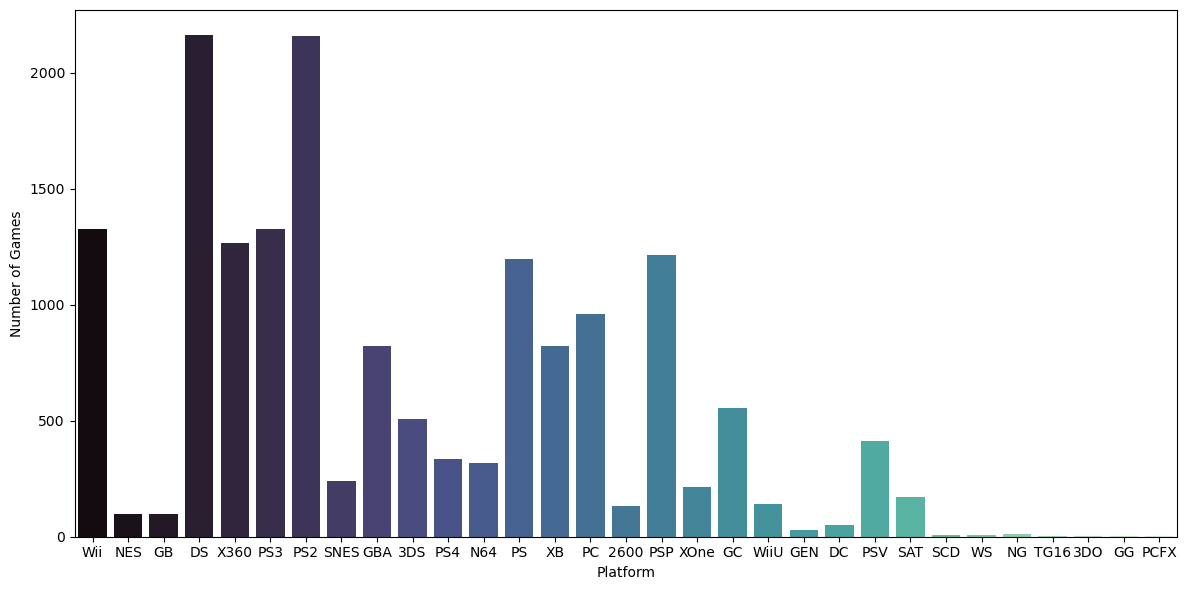

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["Platform"],palette="mako")
plt.ylabel("Number of Games")
plt.tight_layout()

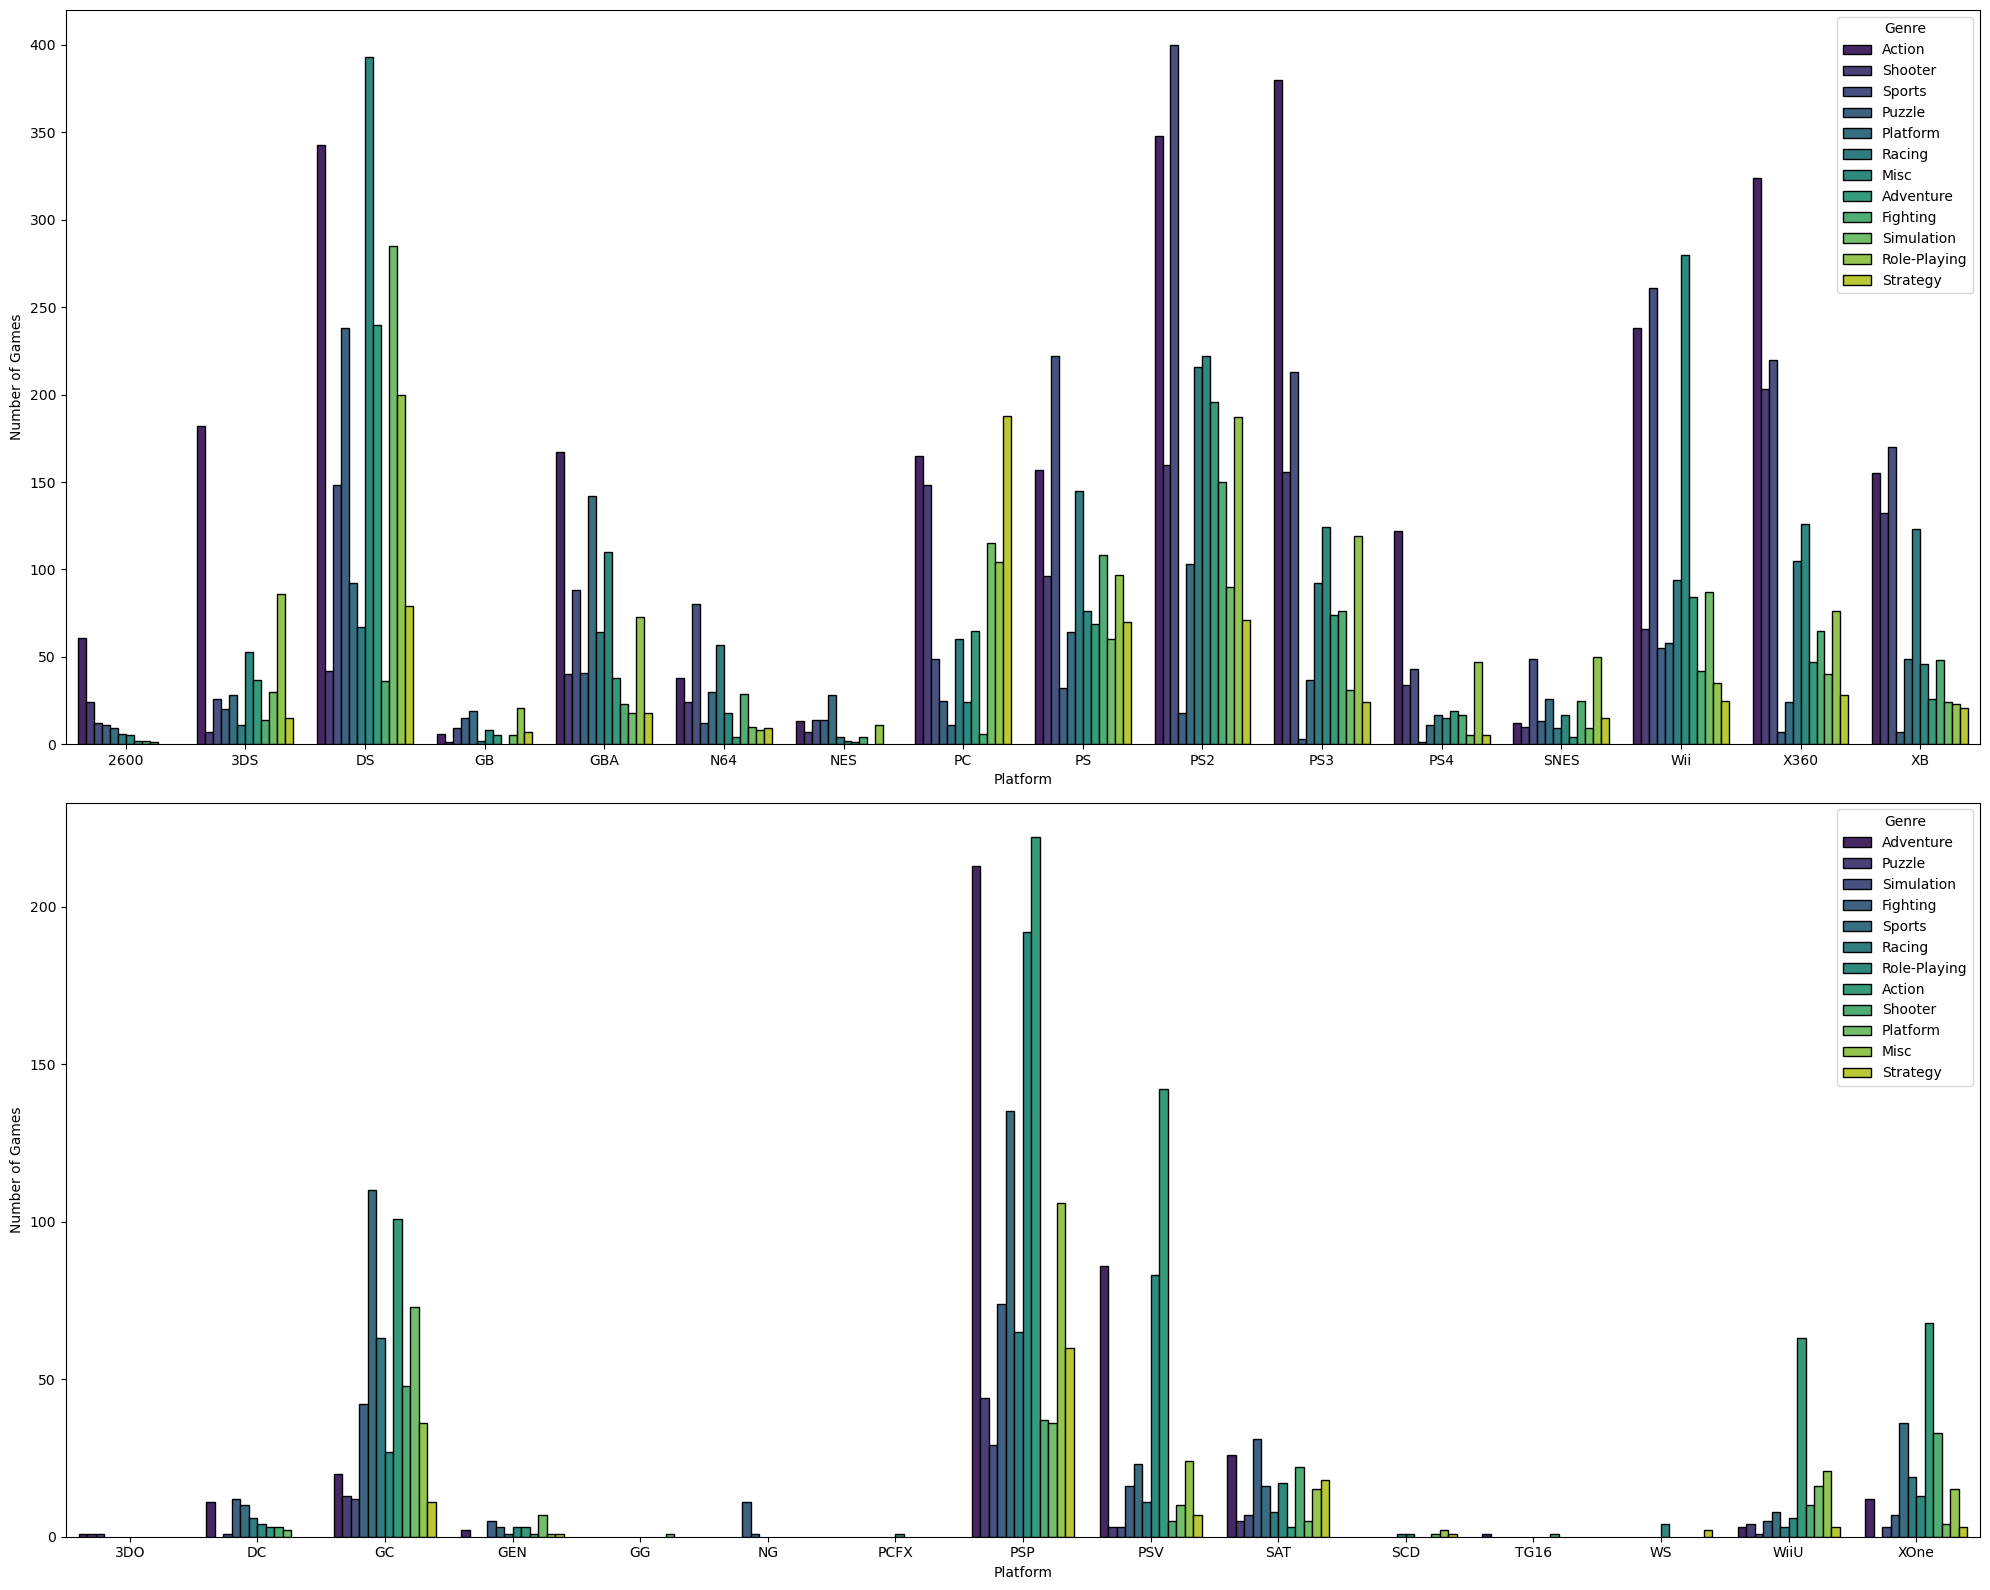

In [21]:
plat = df.groupby("Platform")["Genre"].value_counts().to_frame().rename(columns={"Genre":"Count"}).reset_index()
plat_1 = plat[plat["Platform"].isin(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA','3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600'])]
plat_2 = plat[plat["Platform"].isin(['PSP', 'XOne', 'GC','WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16','3DO', 'GG', 'PCFX'])]
fig , ax = plt.subplots(2,1,figsize = (20,16))
ax1 = sns.barplot(x=plat_1["Platform"],y=plat_1["Count"],hue=plat_1["Genre"],ax=ax[0],edgecolor="black",palette="viridis")
ax1.set_ylabel("Number of Games")
ax2 = sns.barplot(x=plat_2["Platform"],y=plat_2["Count"],hue=plat_2["Genre"],ax=ax[1],edgecolor="black",palette="viridis")
ax2.set_ylabel("Number of Games")
plt.tight_layout()

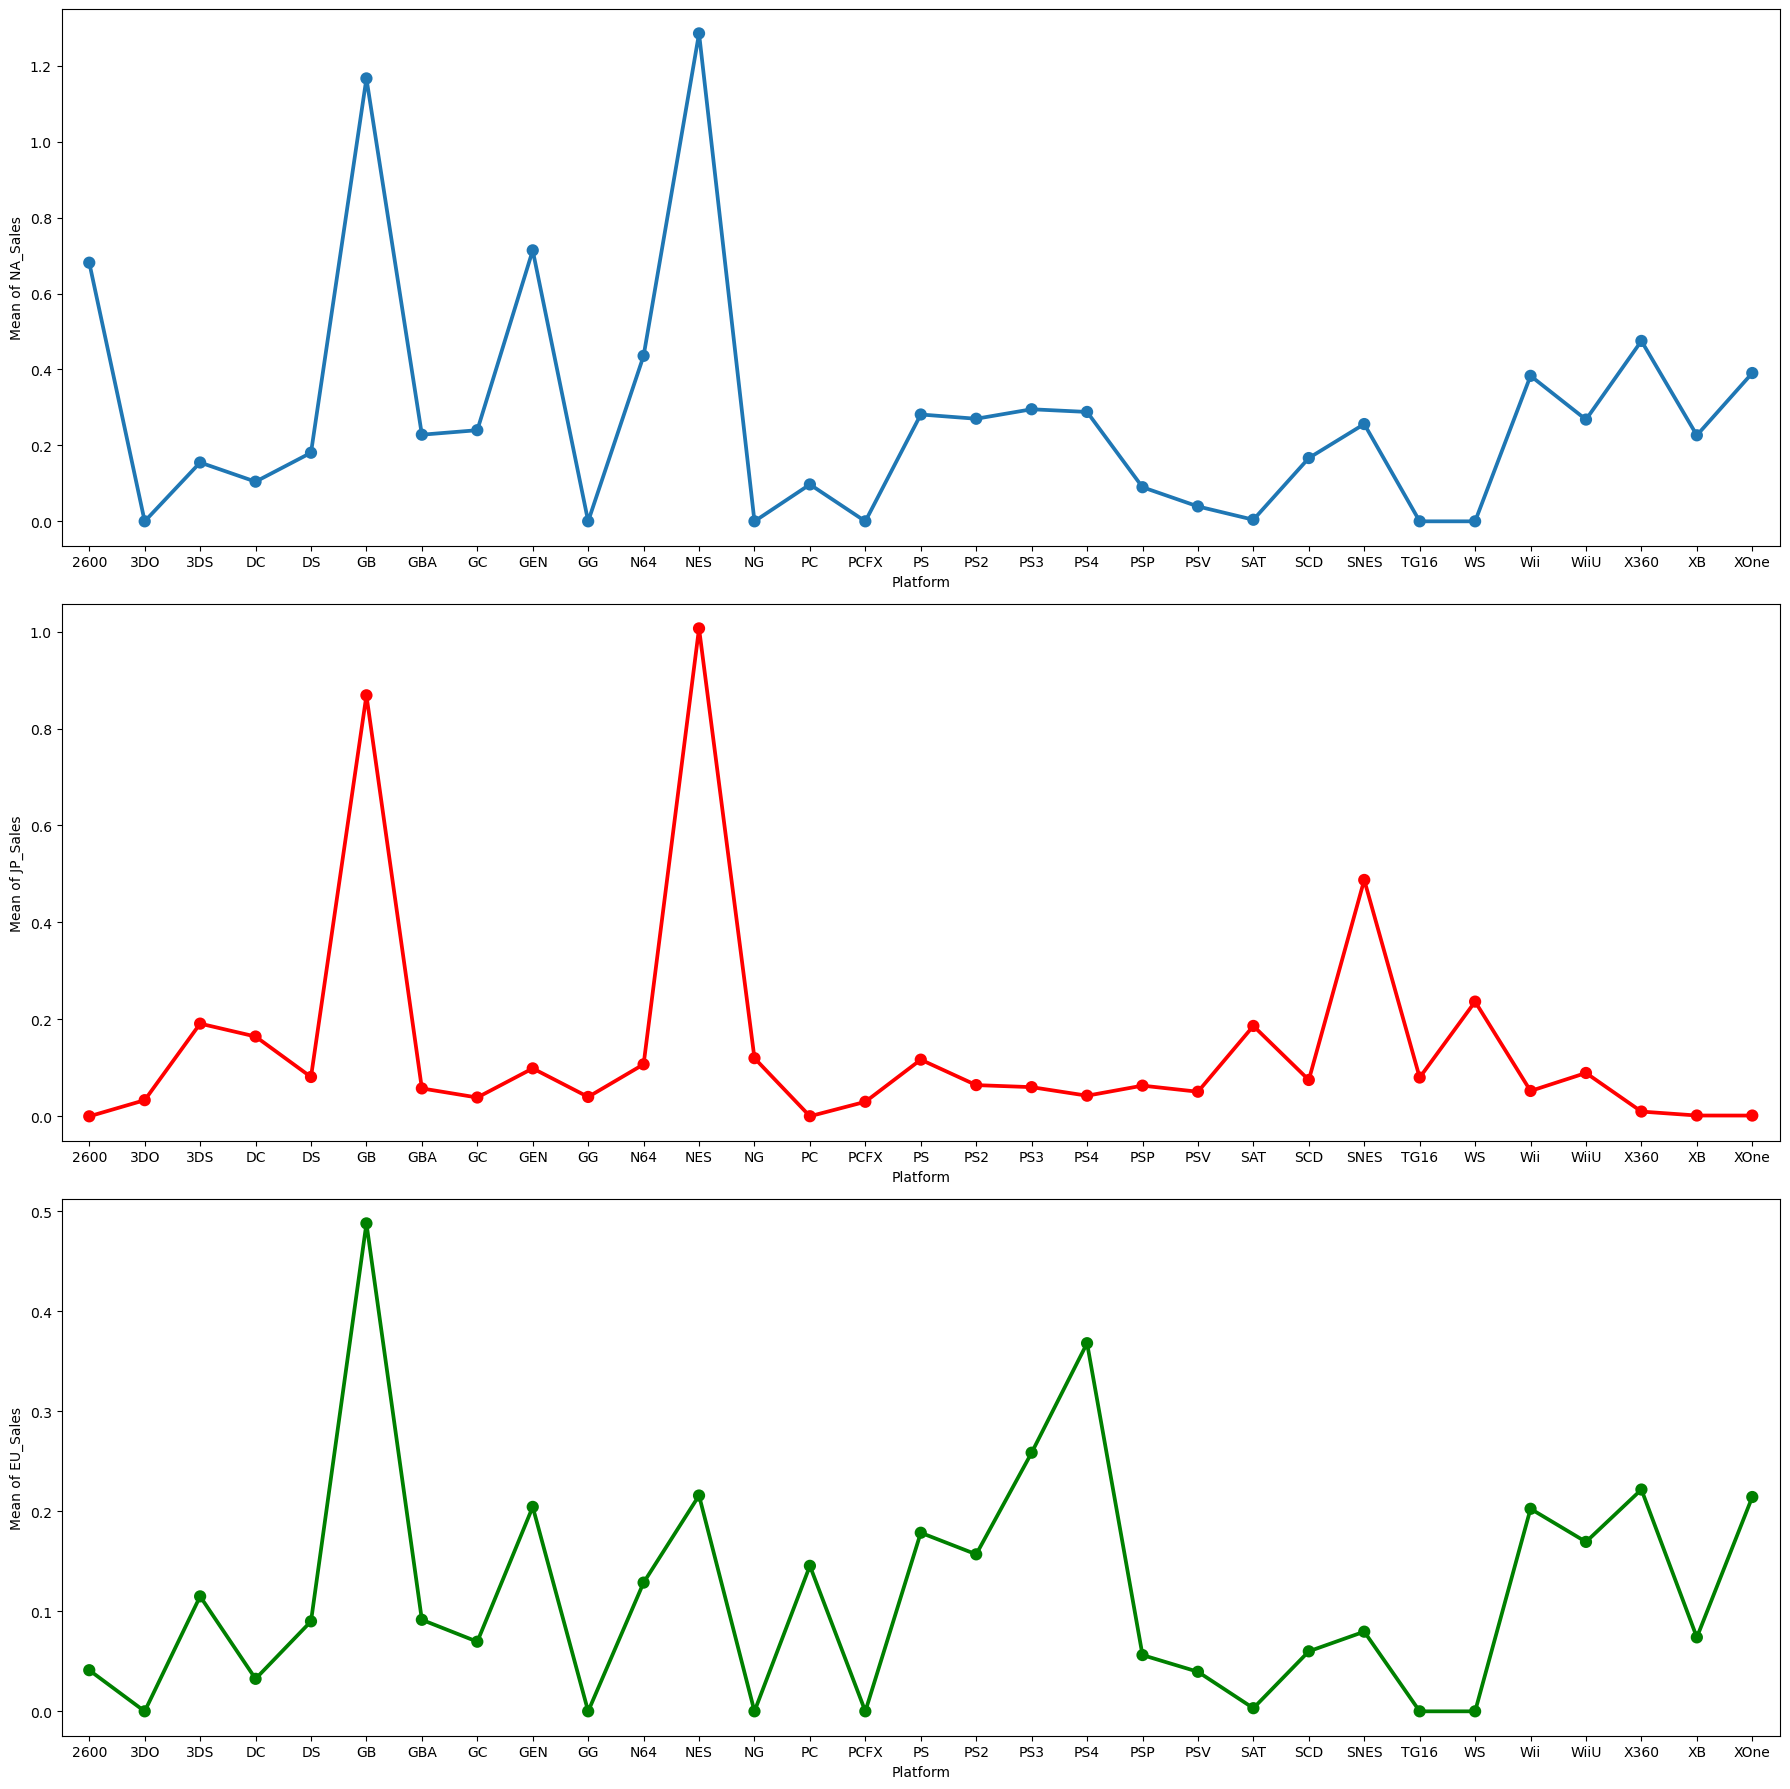

In [22]:
platform_sales = df.groupby("Platform")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].mean().reset_index()
fig , ax = plt.subplots(3,1,figsize = (18,18))
ax1 = sns.pointplot(x=platform_sales["Platform"],y=platform_sales["NA_Sales"],ax=ax[0])
ax1.set_ylabel("Mean of NA_Sales")
ax2 = sns.pointplot(x=platform_sales["Platform"],y=platform_sales["JP_Sales"],ax=ax[1],color="red")
ax2.set_ylabel("Mean of JP_Sales")
ax3 = sns.pointplot(x=platform_sales["Platform"],y=platform_sales["EU_Sales"],ax=ax[2],color="Green")
ax3.set_ylabel("Mean of EU_Sales")
plt.tight_layout()

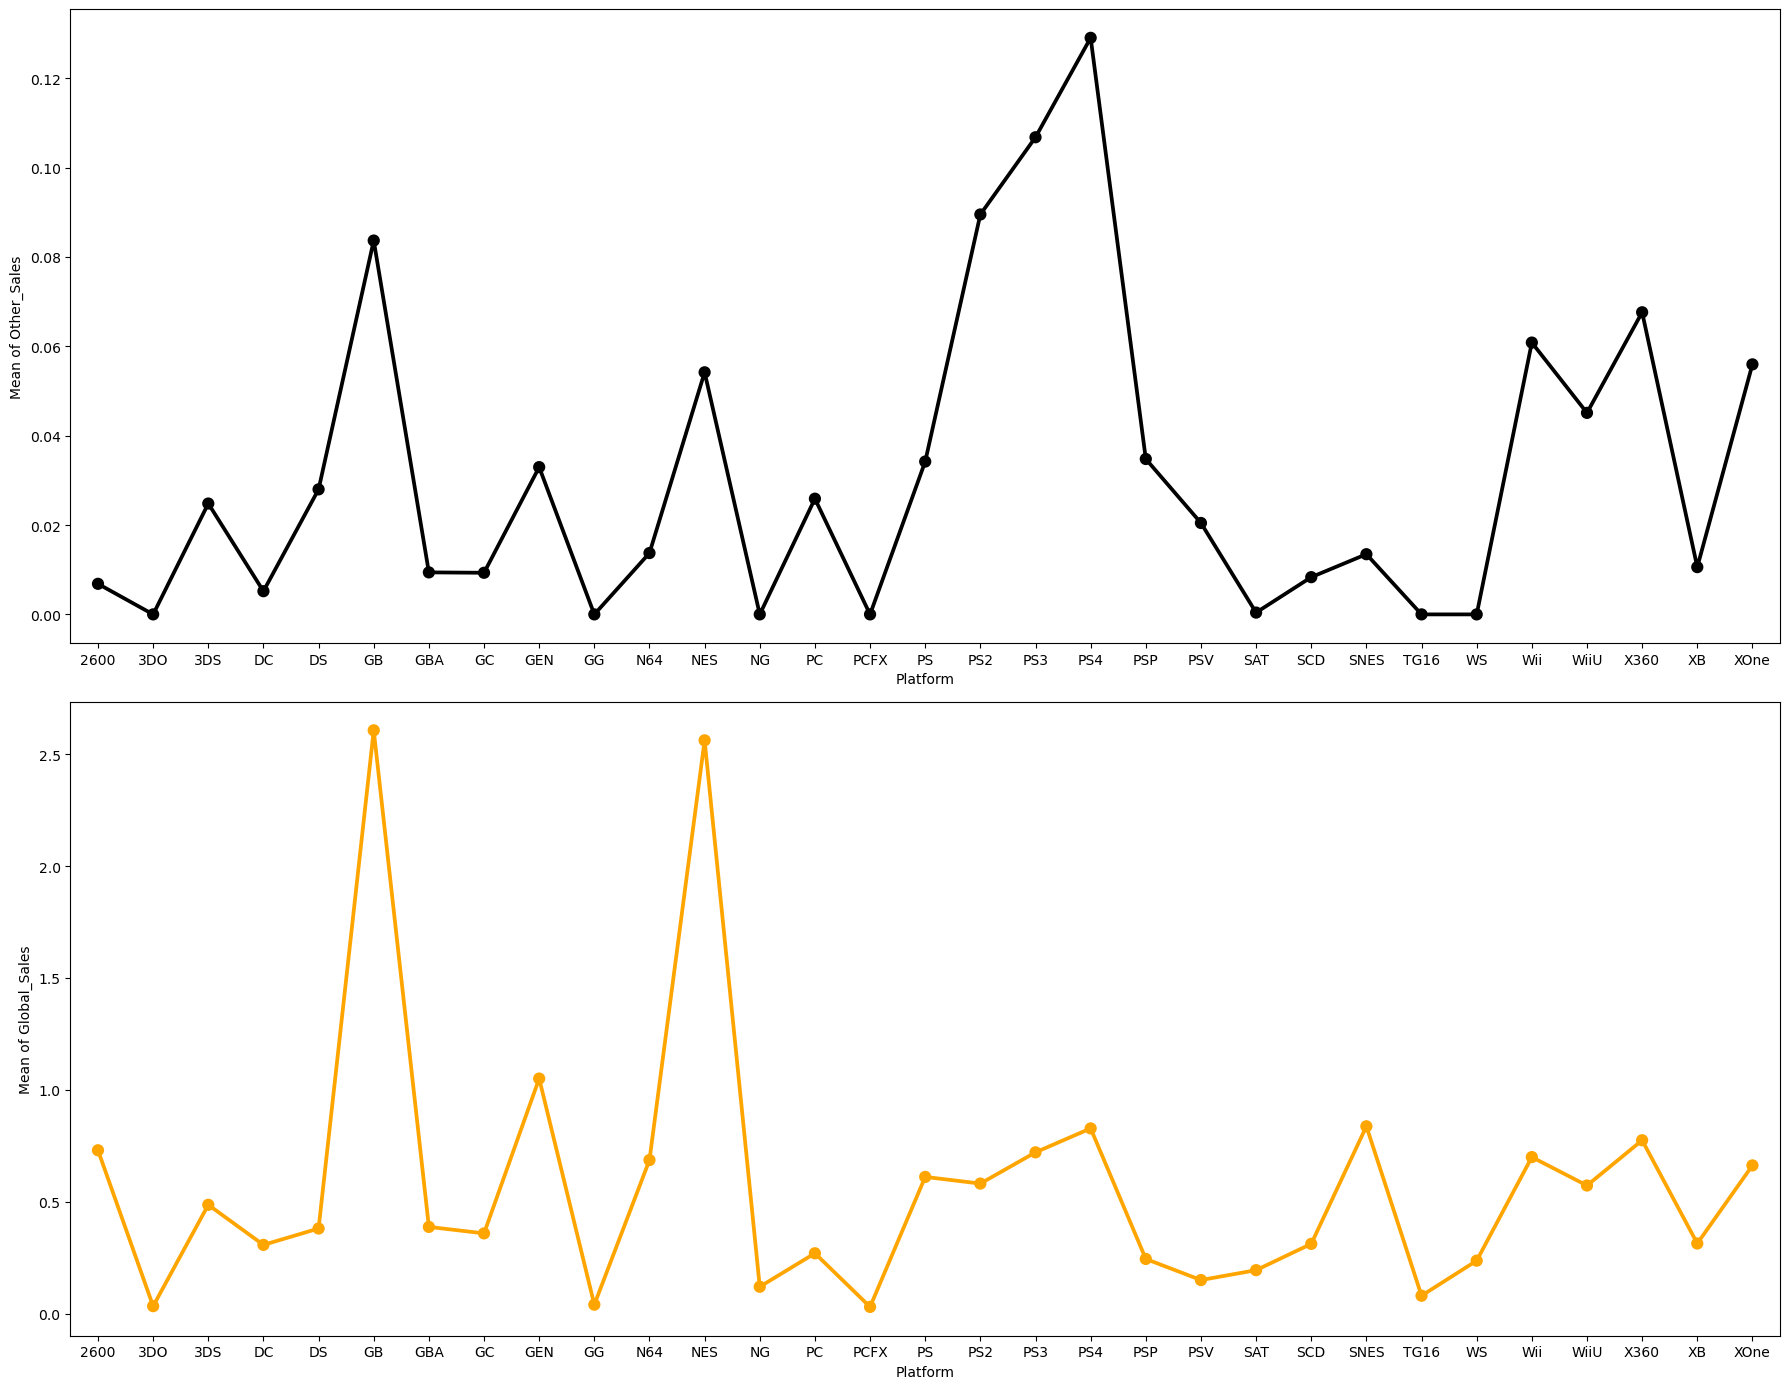

In [23]:
fig , ax = plt.subplots(2,1,figsize = (18,14))
ax4 = sns.pointplot(x=platform_sales["Platform"],y=platform_sales["Other_Sales"],ax=ax[0],color = "black")
ax4.set_ylabel("Mean of Other_Sales")
ax5 = sns.pointplot(x=platform_sales["Platform"],y=platform_sales["Global_Sales"],ax=ax[1],color="orange")
ax5.set_ylabel("Mean of Global_Sales")
plt.tight_layout()

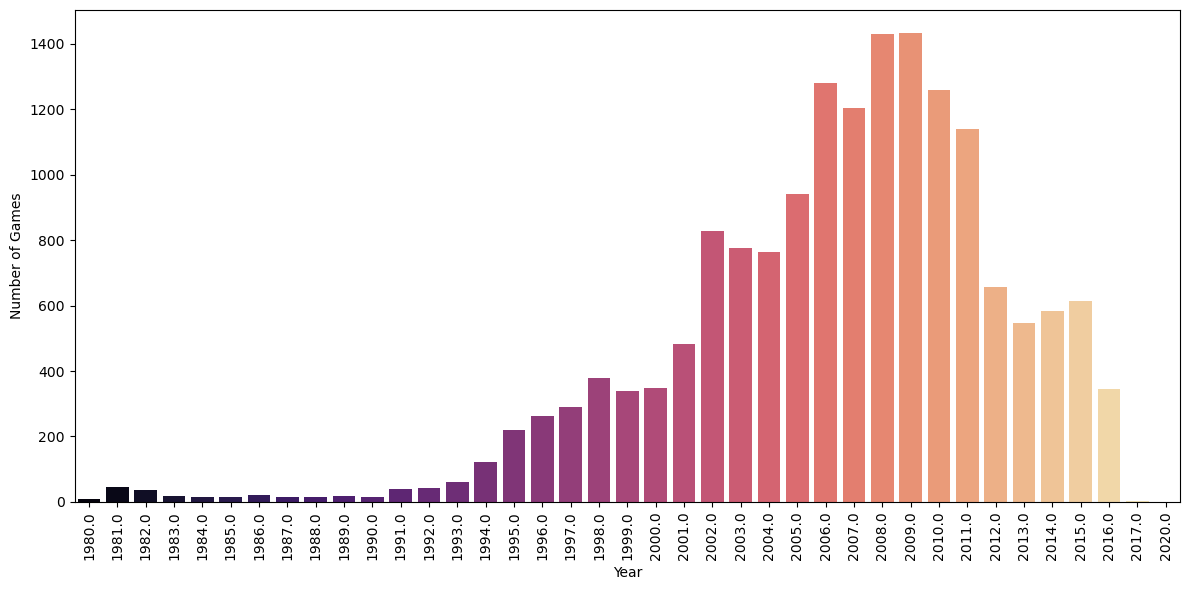

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["Year"],palette="magma")
plt.ylabel("Number of Games")
plt.xticks(rotation=90)
plt.tight_layout()

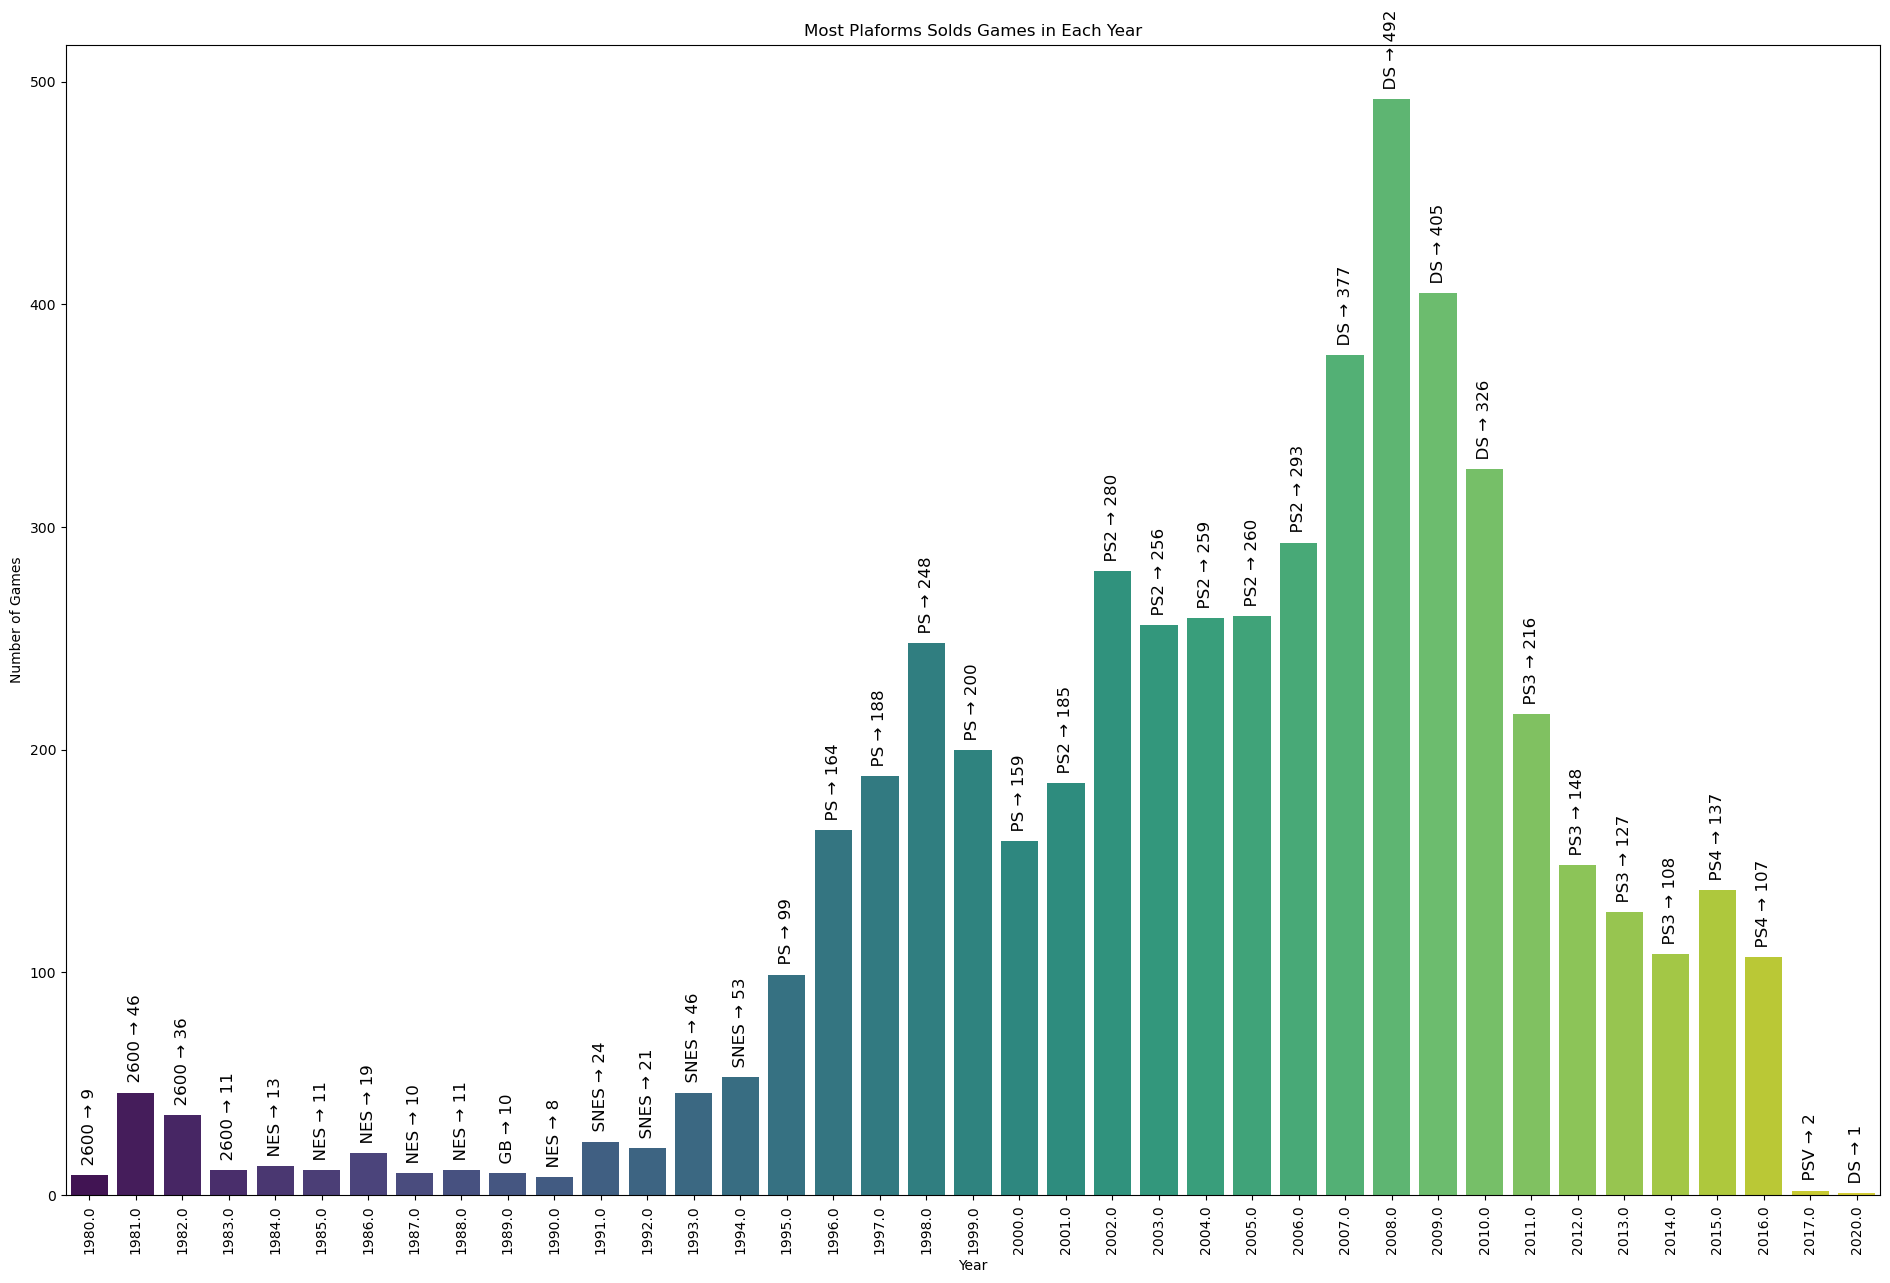

In [25]:
plt.figure(figsize=(19,13))
year_plat_x = df.groupby(by=['Year'])['Platform'].value_counts().to_frame().rename(columns={"Platform":"Counts"}).reset_index()
max_year = year_plat_x.groupby("Year")["Counts"].max().to_frame().reset_index()
year_plat_x = year_plat_x[year_plat_x.set_index(['Year','Counts']).index.isin(max_year.set_index(['Year','Counts']).index)]
plat = year_plat_x["Platform"].reset_index(drop=True)
g=sns.barplot(x="Year",y="Counts",data=year_plat_x,palette="viridis")
index=0
for value in year_plat_x['Counts']:
    g.text(index, value +1, str("  " + plat[index] + ' → ' +str(round(value, 2))), color='#000', size=12, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.ylabel("Number of Games")
plt.title("Most Plaforms Solds Games in Each Year")
plt.tight_layout()

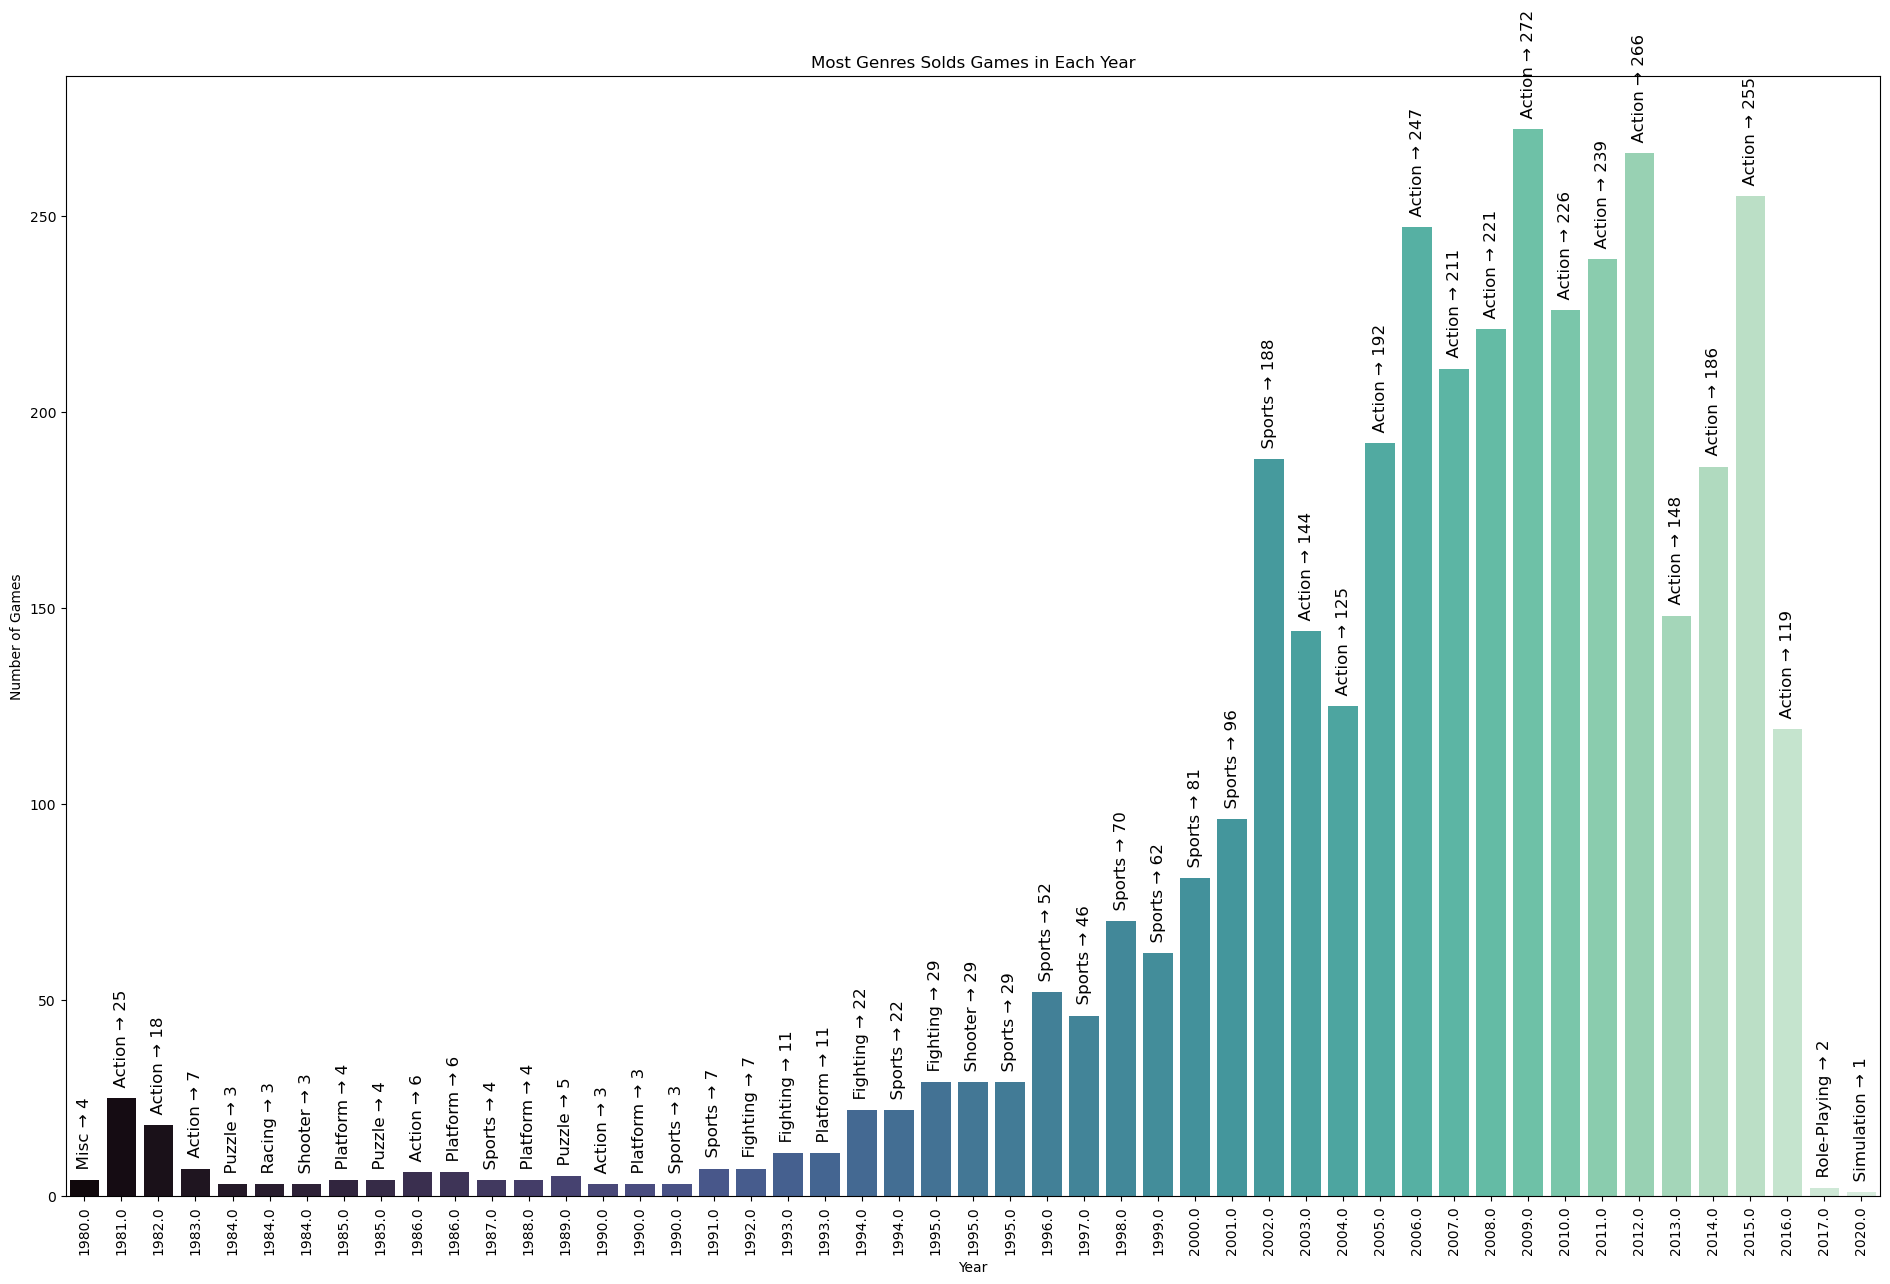

In [26]:
plt.figure(figsize=(19,13))
year_genre_x = df.groupby(by=['Year'])['Genre'].value_counts().to_frame().rename(columns={"Genre":"Counts"}).reset_index()
max_year = year_genre_x.groupby("Year")["Counts"].max().to_frame().reset_index()
year_genre_x = year_genre_x[year_genre_x.set_index(['Year','Counts']).index.isin(max_year.set_index(['Year','Counts']).index)]
genre = year_genre_x["Genre"].reset_index(drop=True)
g=sns.barplot(x=year_genre_x.index,y="Counts",data=year_genre_x,palette="mako")
index=0
for value in year_genre_x['Counts']:
    g.text(index, value +1, str("  " + genre[index] + ' → ' +str(round(value, 2))), color='#000', size=12, rotation= 90, ha="center")
    index += 1
g.set_xticklabels(year_genre_x["Year"])
g.set_xlabel("Year")
plt.ylabel("Number of Games")
plt.xticks(rotation=90)
plt.title("Most Genres Solds Games in Each Year")
plt.tight_layout()

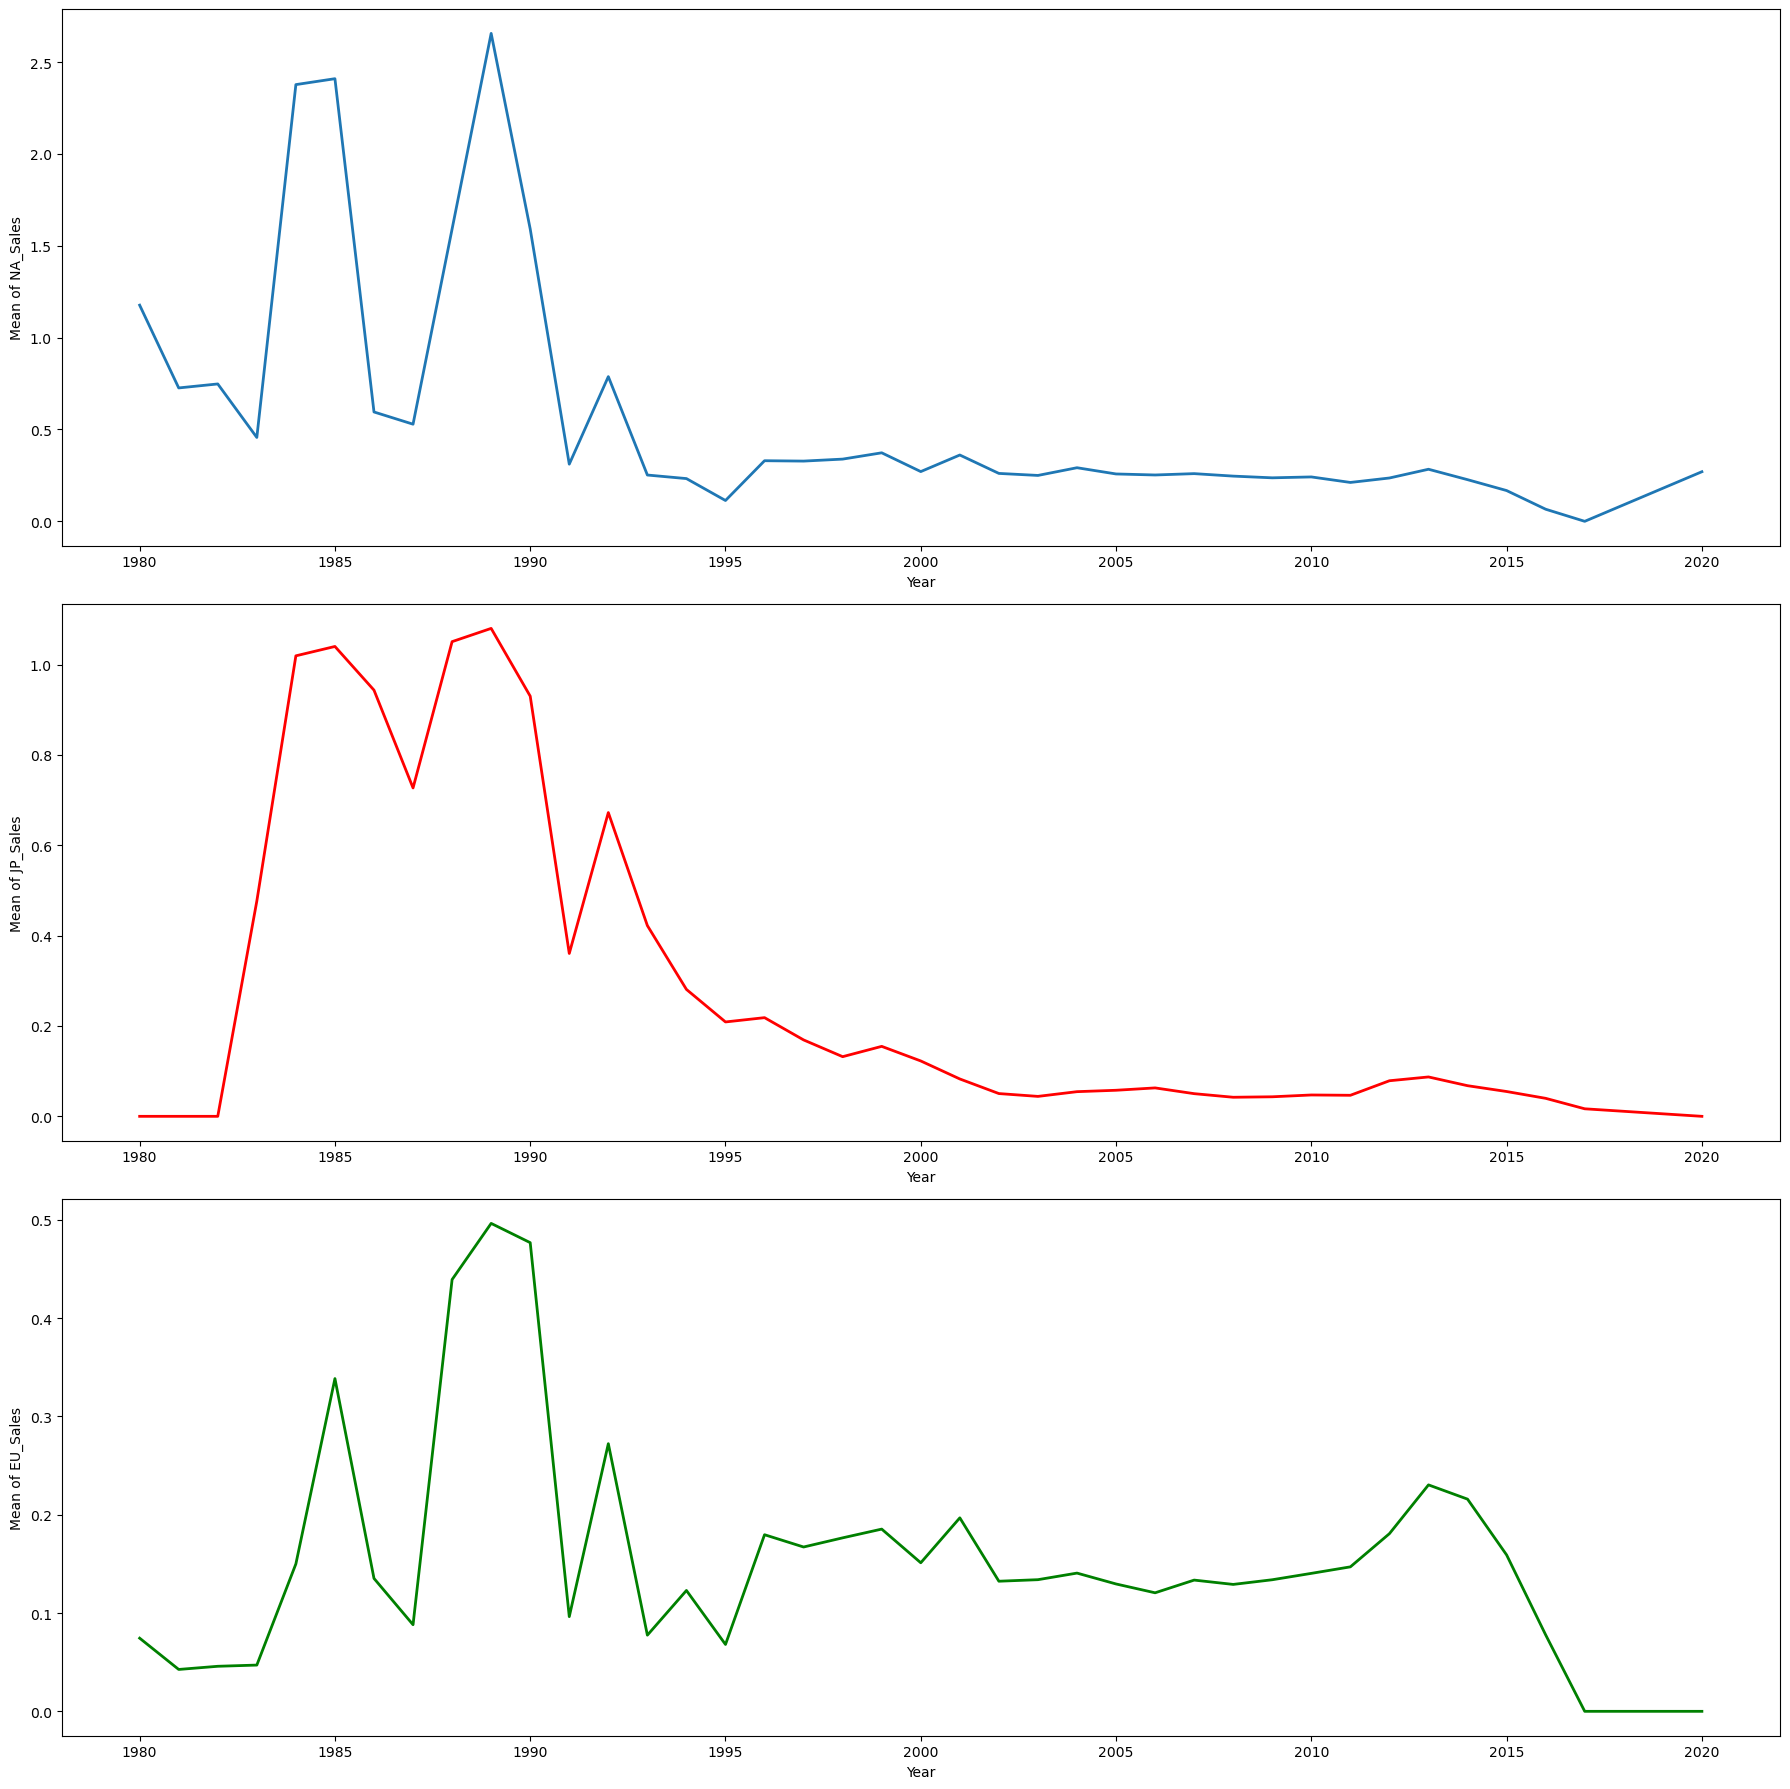

In [27]:
Year_sales = df.groupby("Year")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].mean().reset_index()
fig , ax = plt.subplots(3,1,figsize = (18,18))
ax1 = sns.lineplot(x=Year_sales["Year"],y=Year_sales["NA_Sales"],ax=ax[0],linewidth=2)
ax1.set_ylabel("Mean of NA_Sales")
ax2 = sns.lineplot(x=Year_sales["Year"],y=Year_sales["JP_Sales"],ax=ax[1],color="red",linewidth=2)
ax2.set_ylabel("Mean of JP_Sales")
ax3 = sns.lineplot(x=Year_sales["Year"],y=Year_sales["EU_Sales"],ax=ax[2],color="Green",linewidth=2)
ax3.set_ylabel("Mean of EU_Sales")
plt.tight_layout()

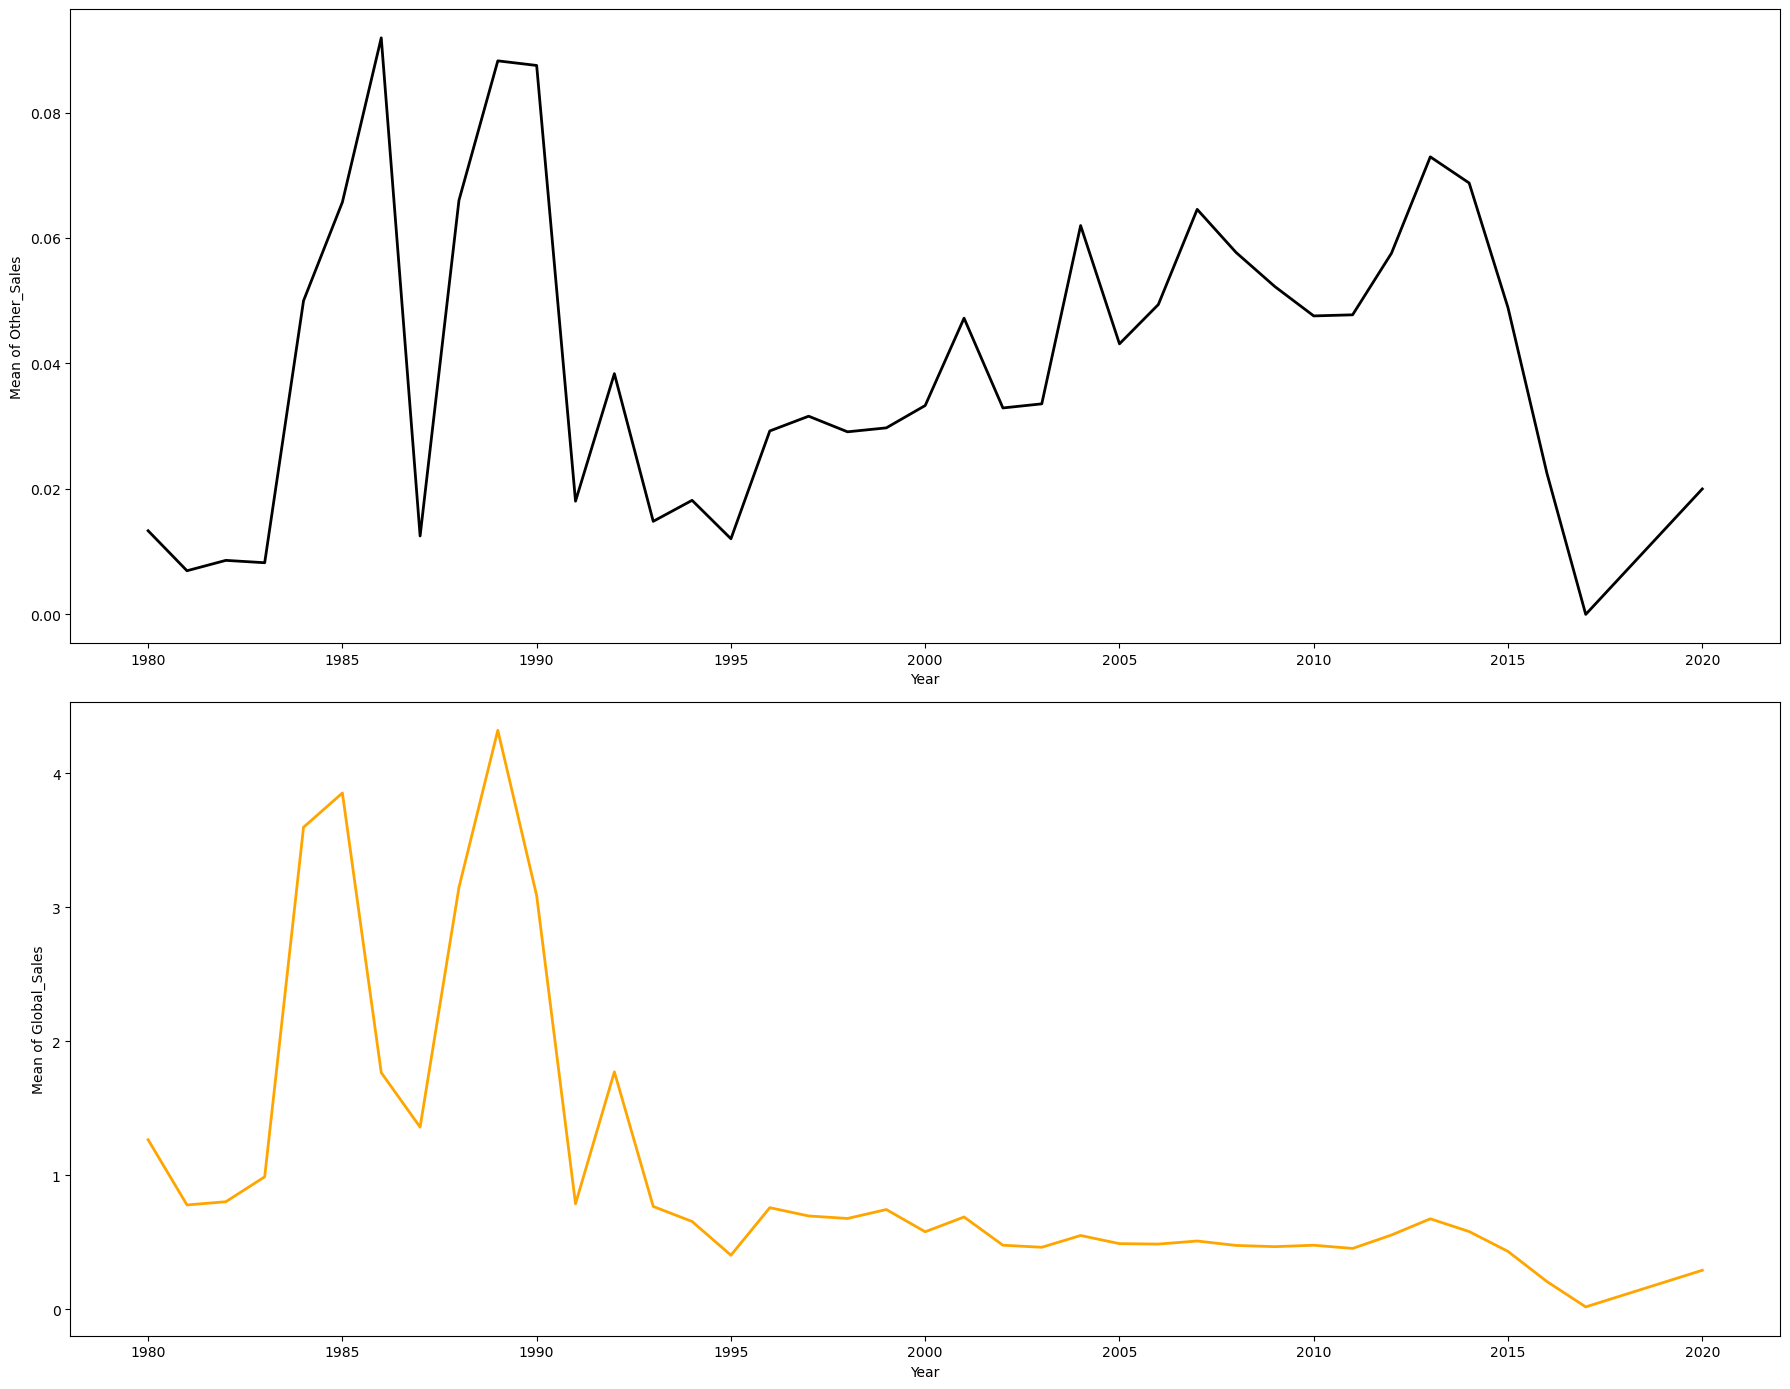

In [28]:
fig , ax = plt.subplots(2,1,figsize = (18,14))
ax4 = sns.lineplot(x=Year_sales["Year"],y=Year_sales["Other_Sales"],ax=ax[0],color = "black",linewidth=2)
ax4.set_ylabel("Mean of Other_Sales")
ax5 = sns.lineplot(x=Year_sales["Year"],y=Year_sales["Global_Sales"],ax=ax[1],color="orange",linewidth=2)
ax5.set_ylabel("Mean of Global_Sales")
plt.tight_layout()

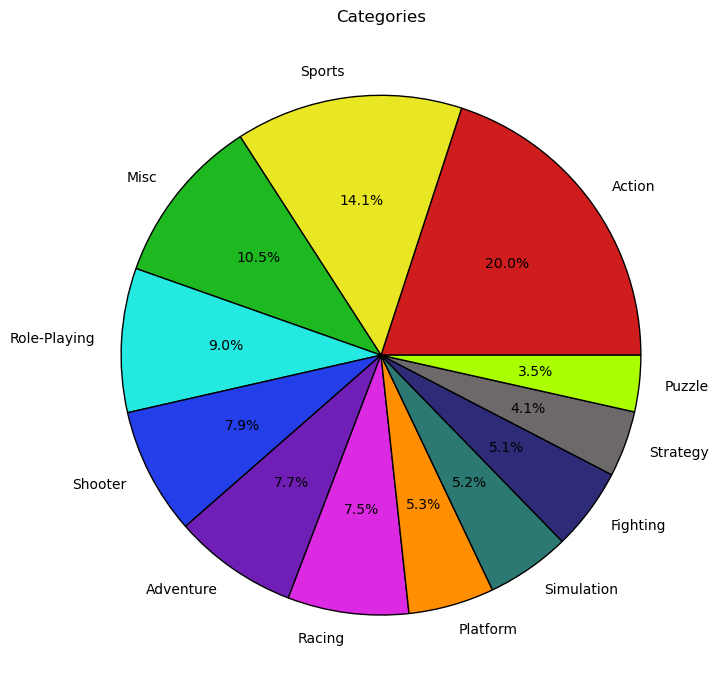

In [29]:
plt.figure(figsize=(13,7))
Geners=dict(df["Genre"].value_counts())
Gene=Geners.keys()
col=["#CF1C1C","#E9E624","#1EB821","#24E9E0","#243FE9","#6F1FB5","#DC2AE2","#FF8F00","#2C7872","#2E2C78","#6D696A","#AAFF00"]
Values=Geners.values()
plt.pie(Values,labels=Gene,colors=col,wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.title("Categories")
plt.tight_layout()

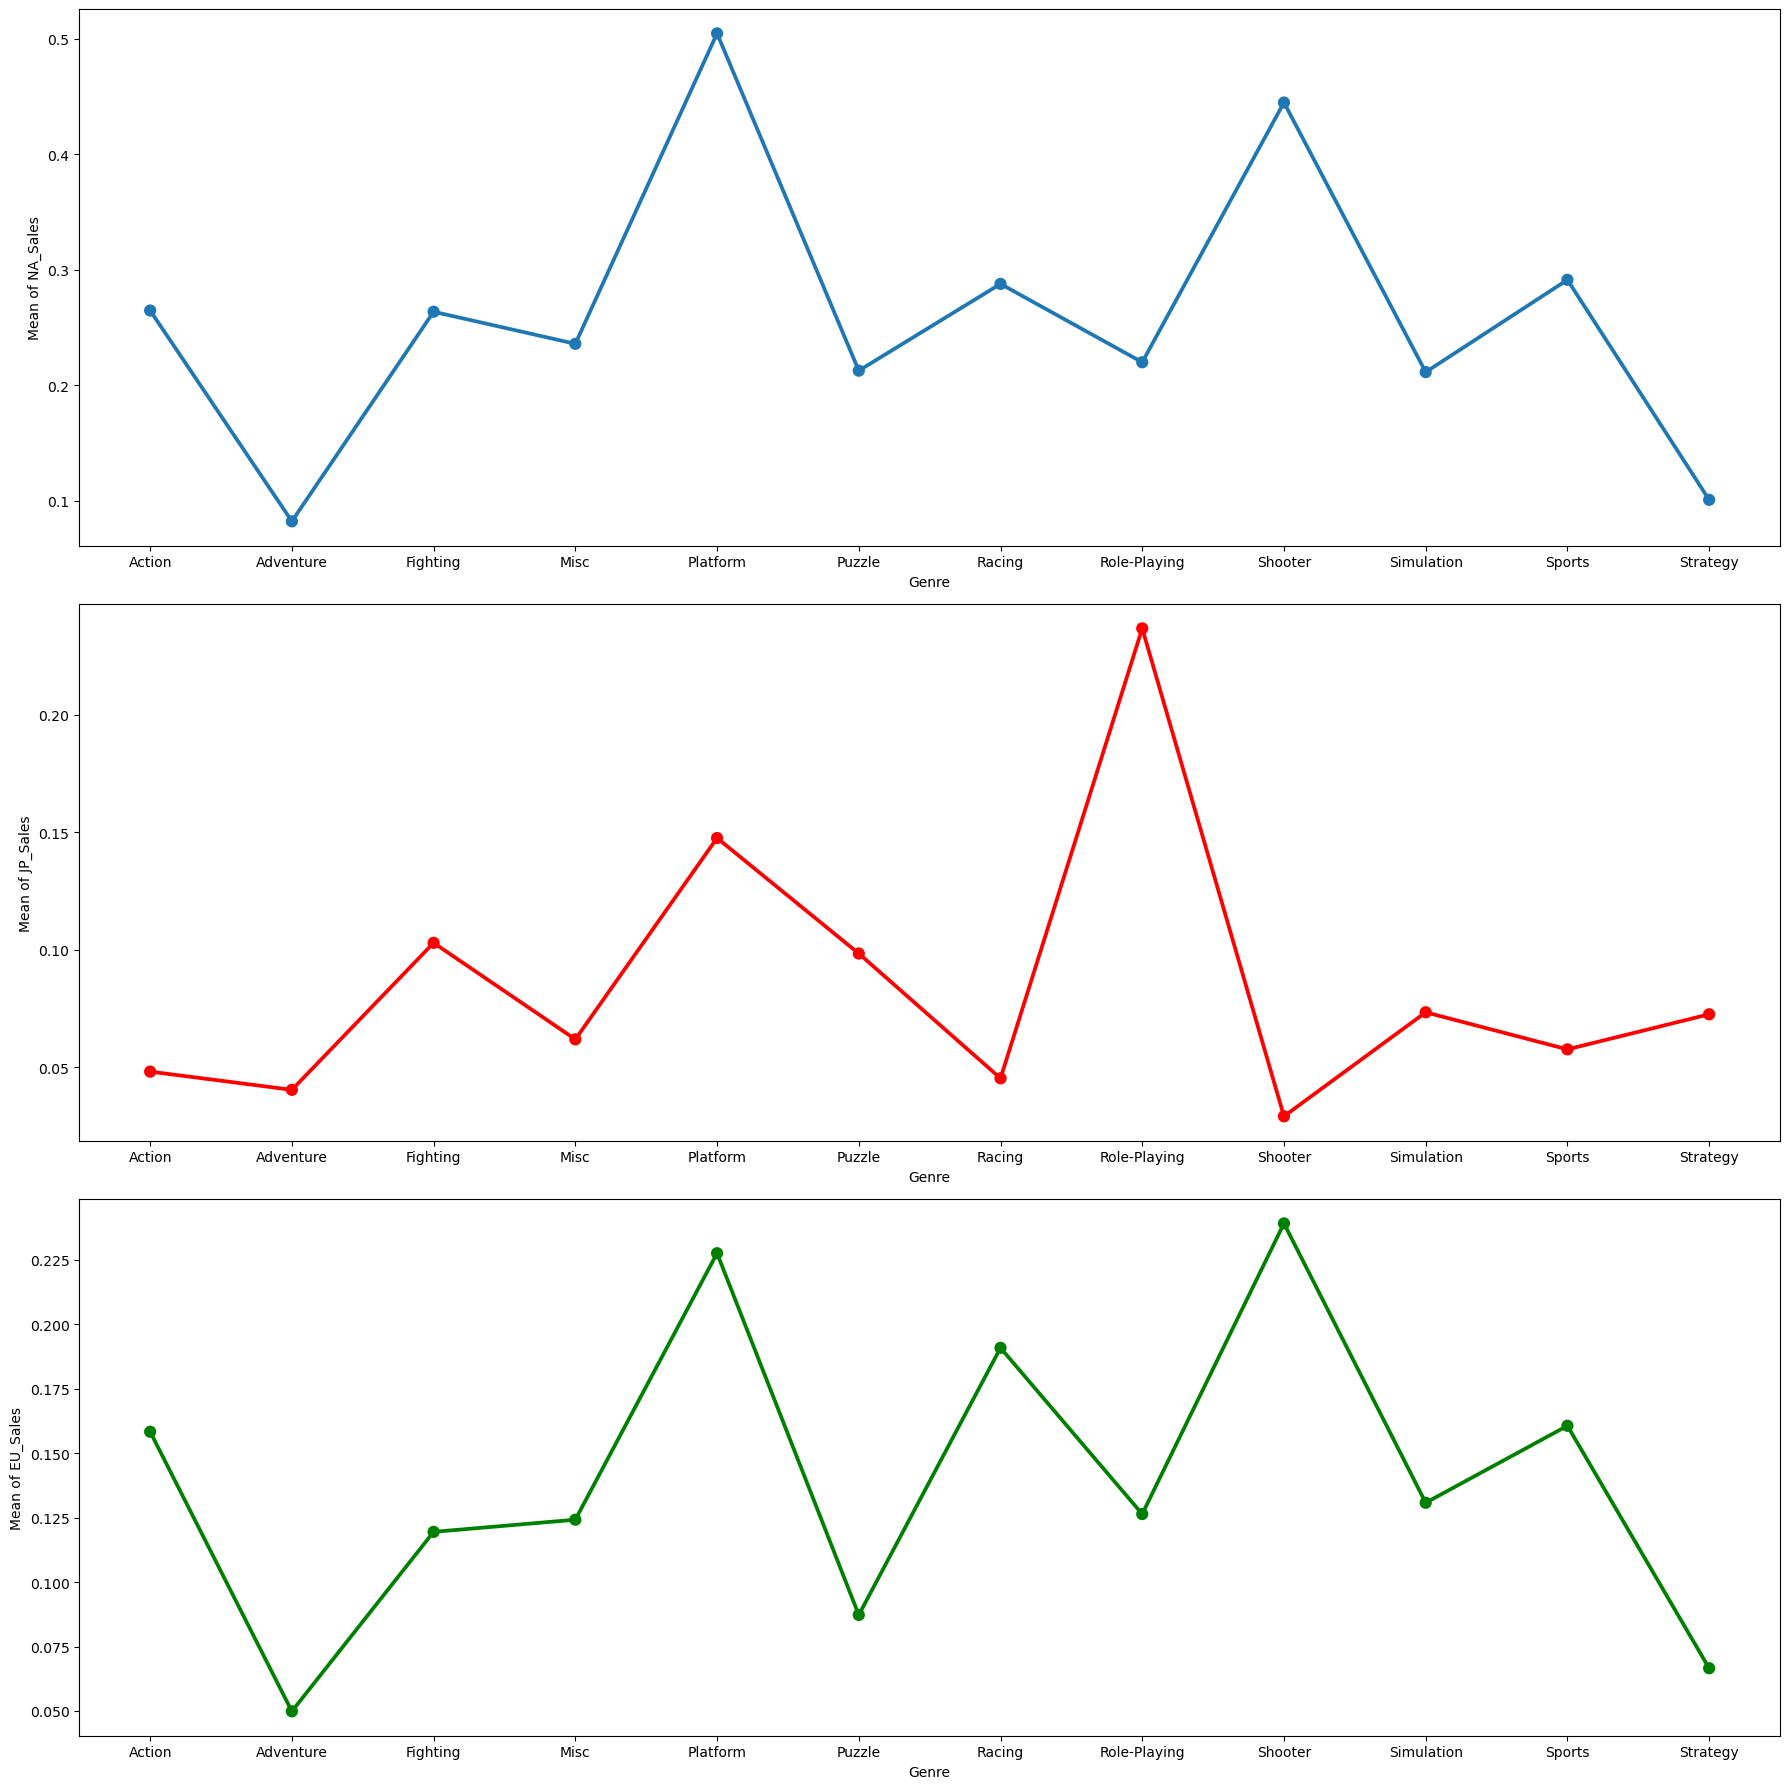

In [30]:
Genre_sales = df.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].mean().reset_index()
fig , ax = plt.subplots(3,1,figsize = (18,18))
ax1 = sns.pointplot(x=Genre_sales["Genre"],y=Genre_sales["NA_Sales"],ax=ax[0])
ax1.set_ylabel("Mean of NA_Sales")
ax2 = sns.pointplot(x=Genre_sales["Genre"],y=Genre_sales["JP_Sales"],ax=ax[1],color="red")
ax2.set_ylabel("Mean of JP_Sales")
ax3 = sns.pointplot(x=Genre_sales["Genre"],y=Genre_sales["EU_Sales"],ax=ax[2],color="Green")
ax3.set_ylabel("Mean of EU_Sales")
plt.tight_layout()

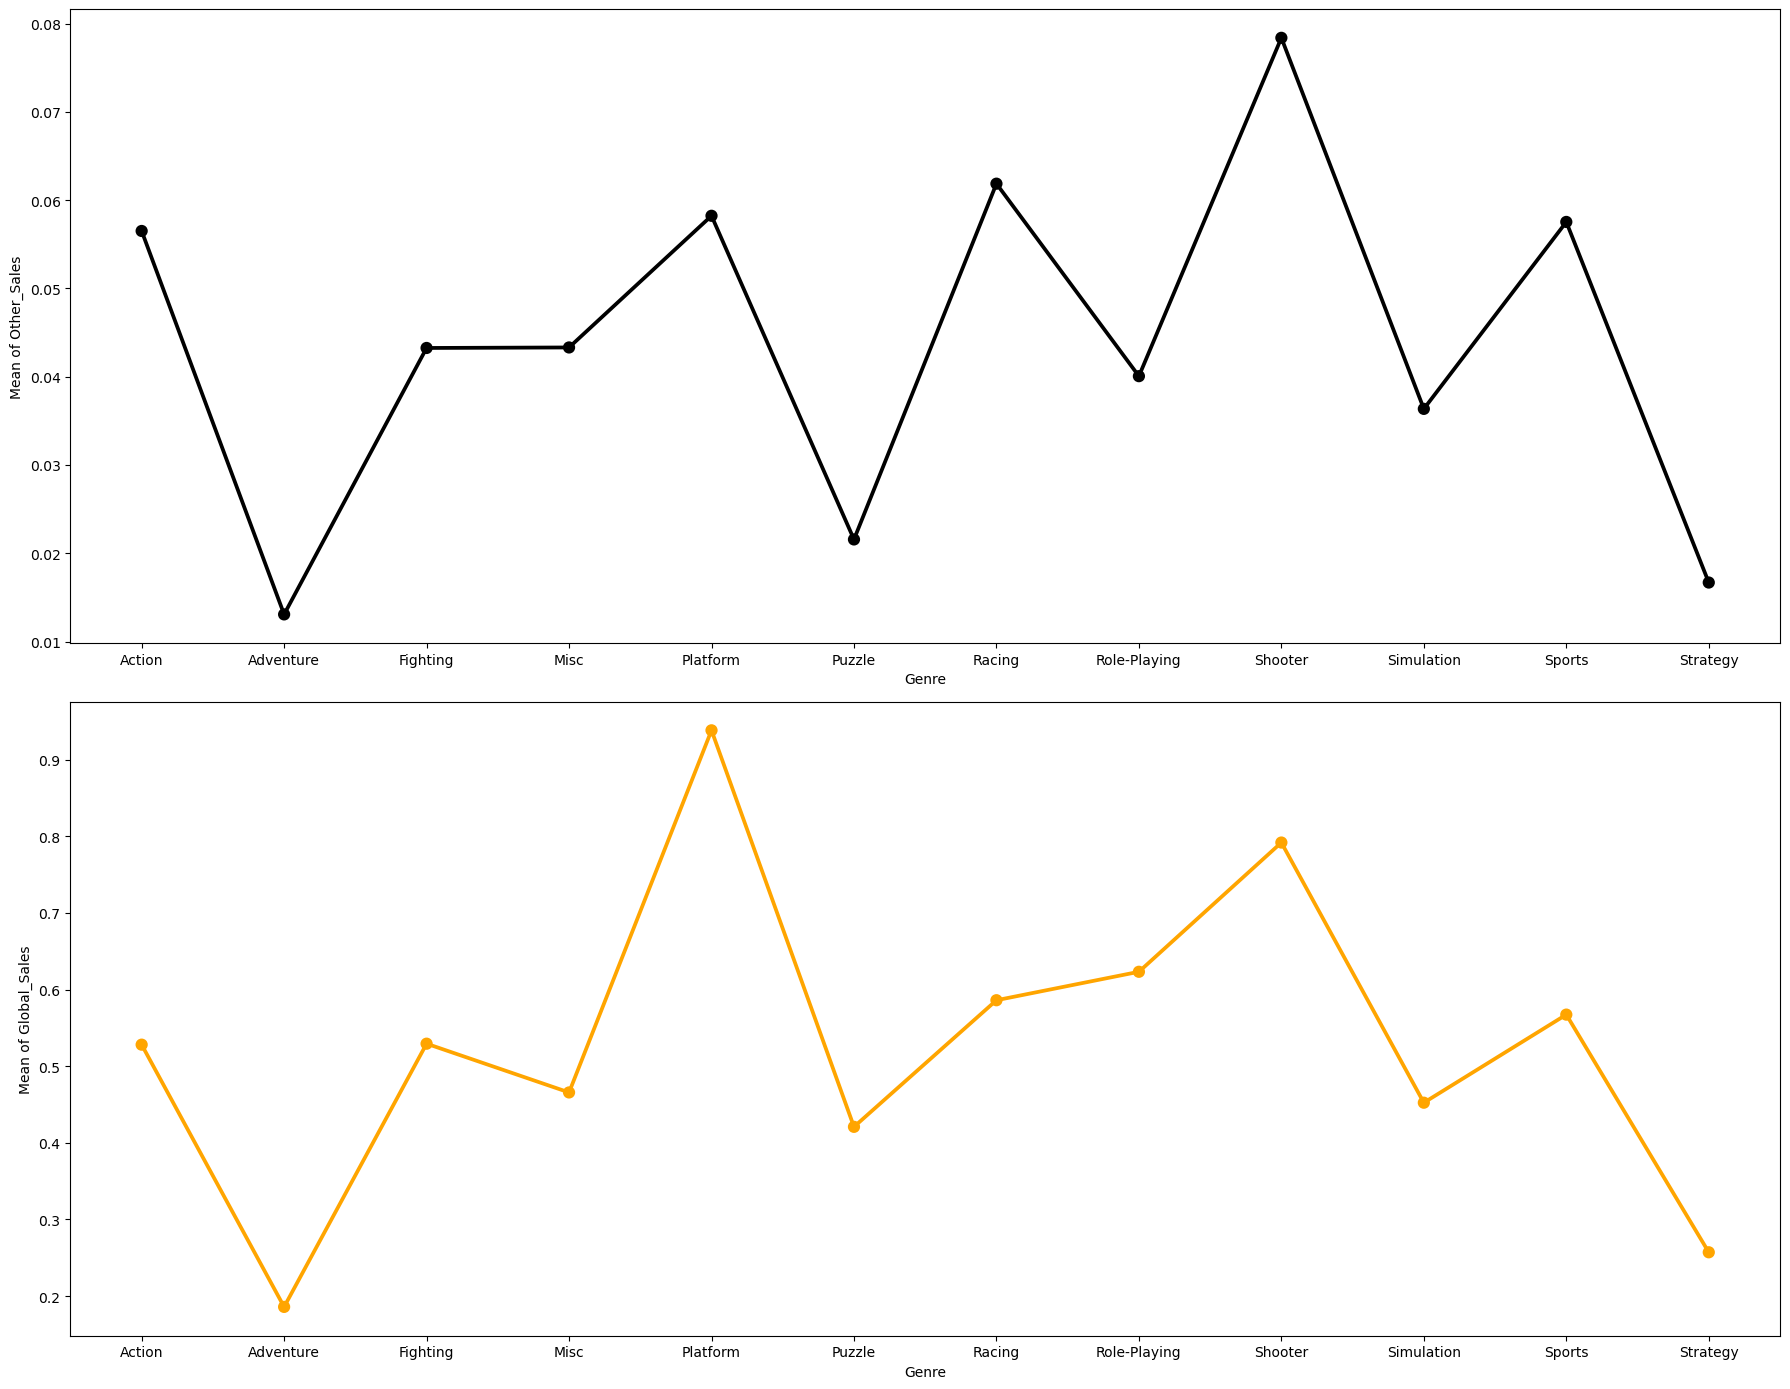

In [31]:
fig , ax = plt.subplots(2,1,figsize = (18,14))
ax4 = sns.pointplot(x=Genre_sales["Genre"],y=Genre_sales["Other_Sales"],ax=ax[0],color = "black")
ax4.set_ylabel("Mean of Other_Sales")
ax5 = sns.pointplot(x=Genre_sales["Genre"],y=Genre_sales["Global_Sales"],ax=ax[1],color="orange")
ax5.set_ylabel("Mean of Global_Sales")
plt.tight_layout()

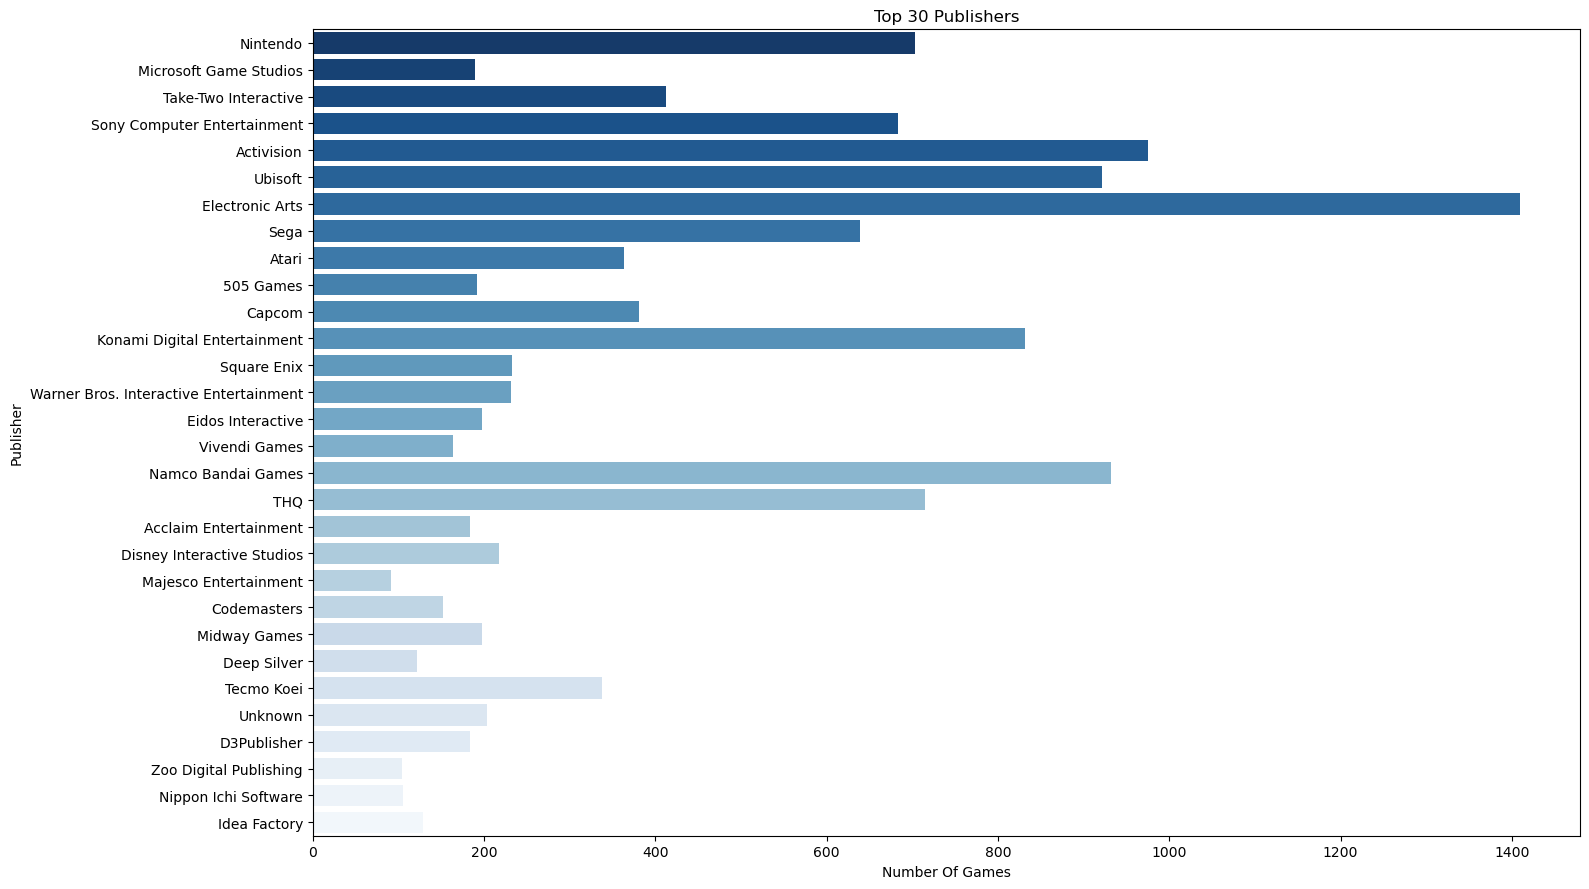

In [32]:
plt.figure(figsize=(16,9))
filt=df["Publisher"].value_counts().head(30).index.tolist()
Publisher_df=df[df["Publisher"].isin(filt)]
ax=sns.countplot(y="Publisher",data=Publisher_df,palette="Blues_r")
plt.xlabel("Number Of Games")
plt.title("Top 30 Publishers")
plt.tight_layout()

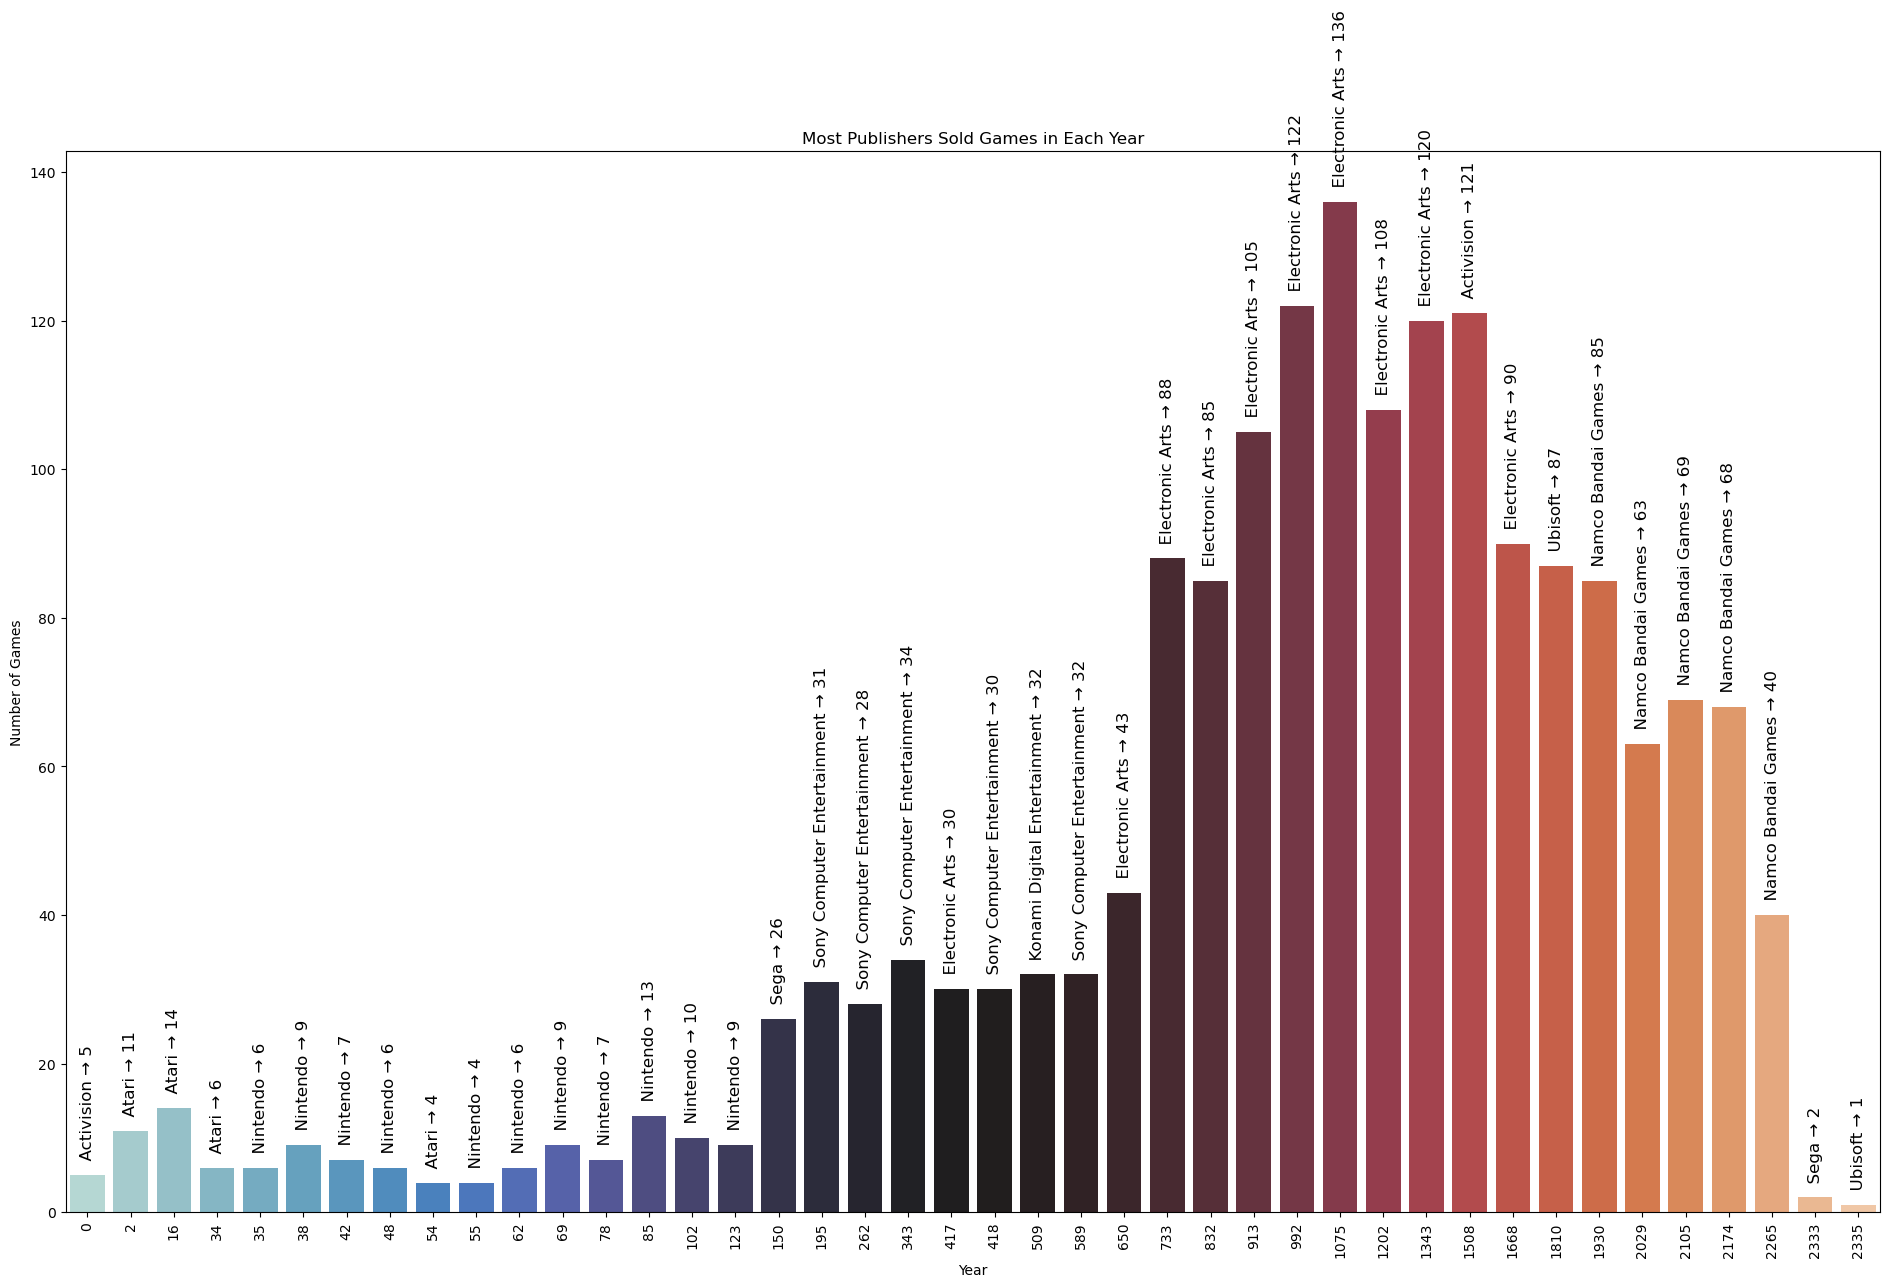

In [33]:
plt.figure(figsize=(19,13))
year_pub_x = df.groupby(by=['Year'])['Publisher'].value_counts().to_frame().rename(columns={"Publisher":"Counts"}).reset_index()
max_year = year_pub_x.groupby("Year")["Counts"].max().to_frame().reset_index()
year_pub_x = year_pub_x[year_pub_x.set_index(['Year','Counts']).index.isin(max_year.set_index(['Year','Counts']).index)]
Publisher = year_pub_x["Publisher"].reset_index(drop=True)
g=sns.barplot(x=year_pub_x.index,y="Counts",data=year_pub_x,palette="icefire")
index=0
for value in year_pub_x['Counts']:
    g.text(index, value +1, str("  " + Publisher[index] + ' → ' +str(round(value, 2))), color='#000', size=12, rotation= 90, ha="center")
    index += 1
g.set_xlabel("Year")
plt.ylabel("Number of Games")
plt.xticks(rotation=90)
plt.title("Most Publishers Sold Games in Each Year")
plt.tight_layout()

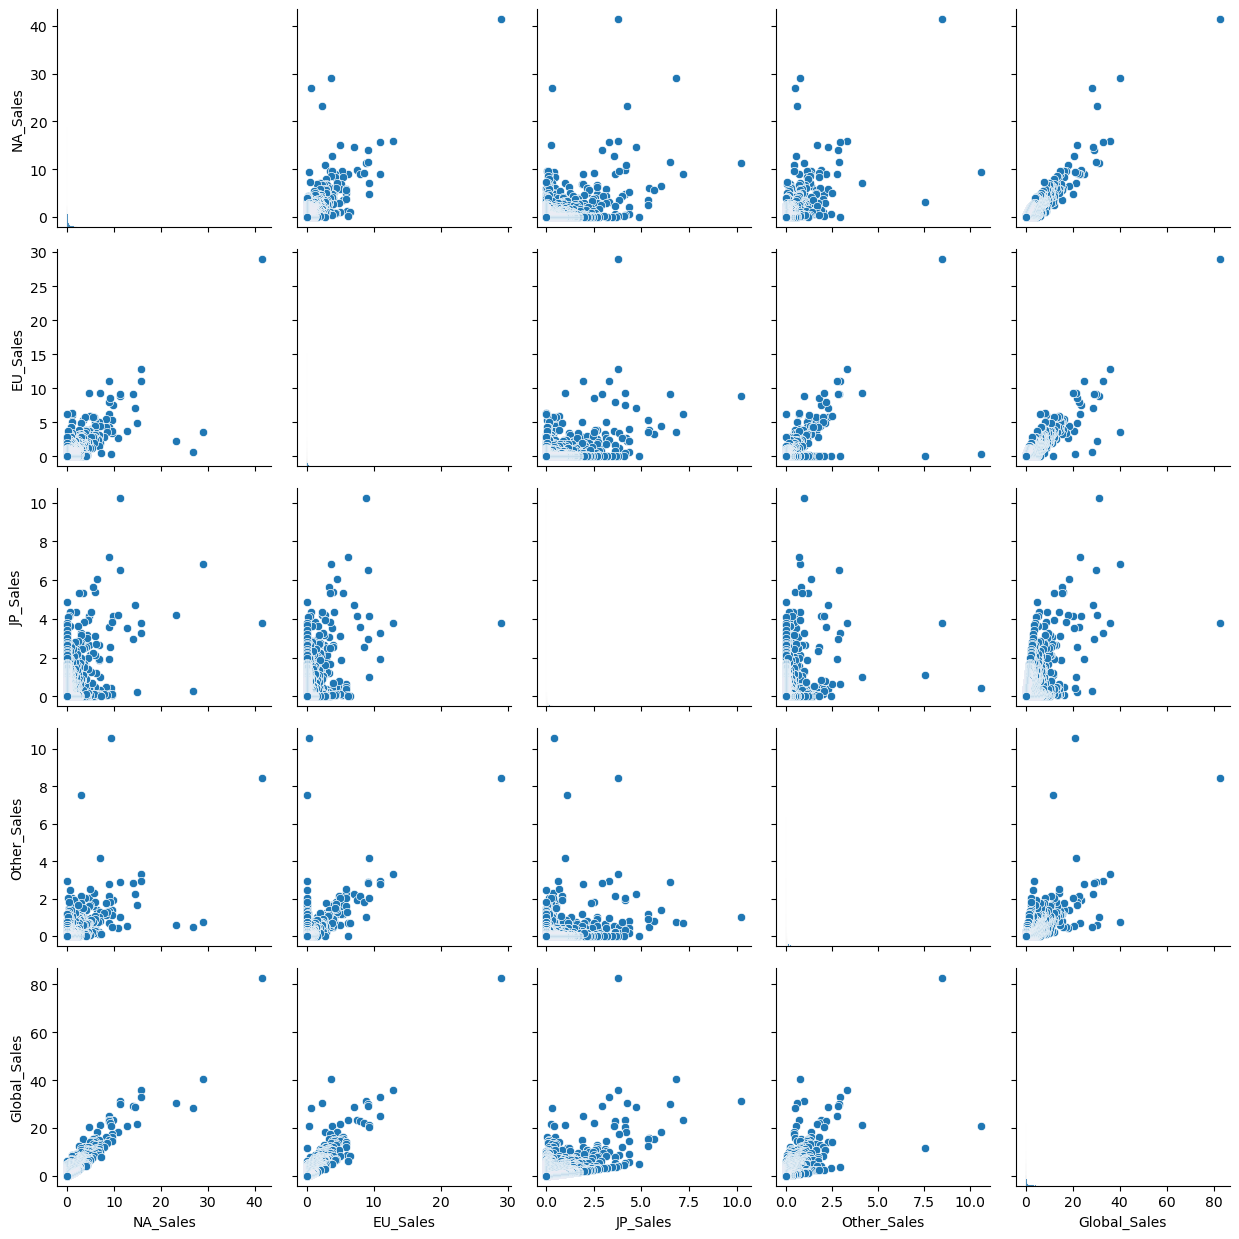

In [34]:
num_col =["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
sns.pairplot(df[num_col])
plt.tight_layout()

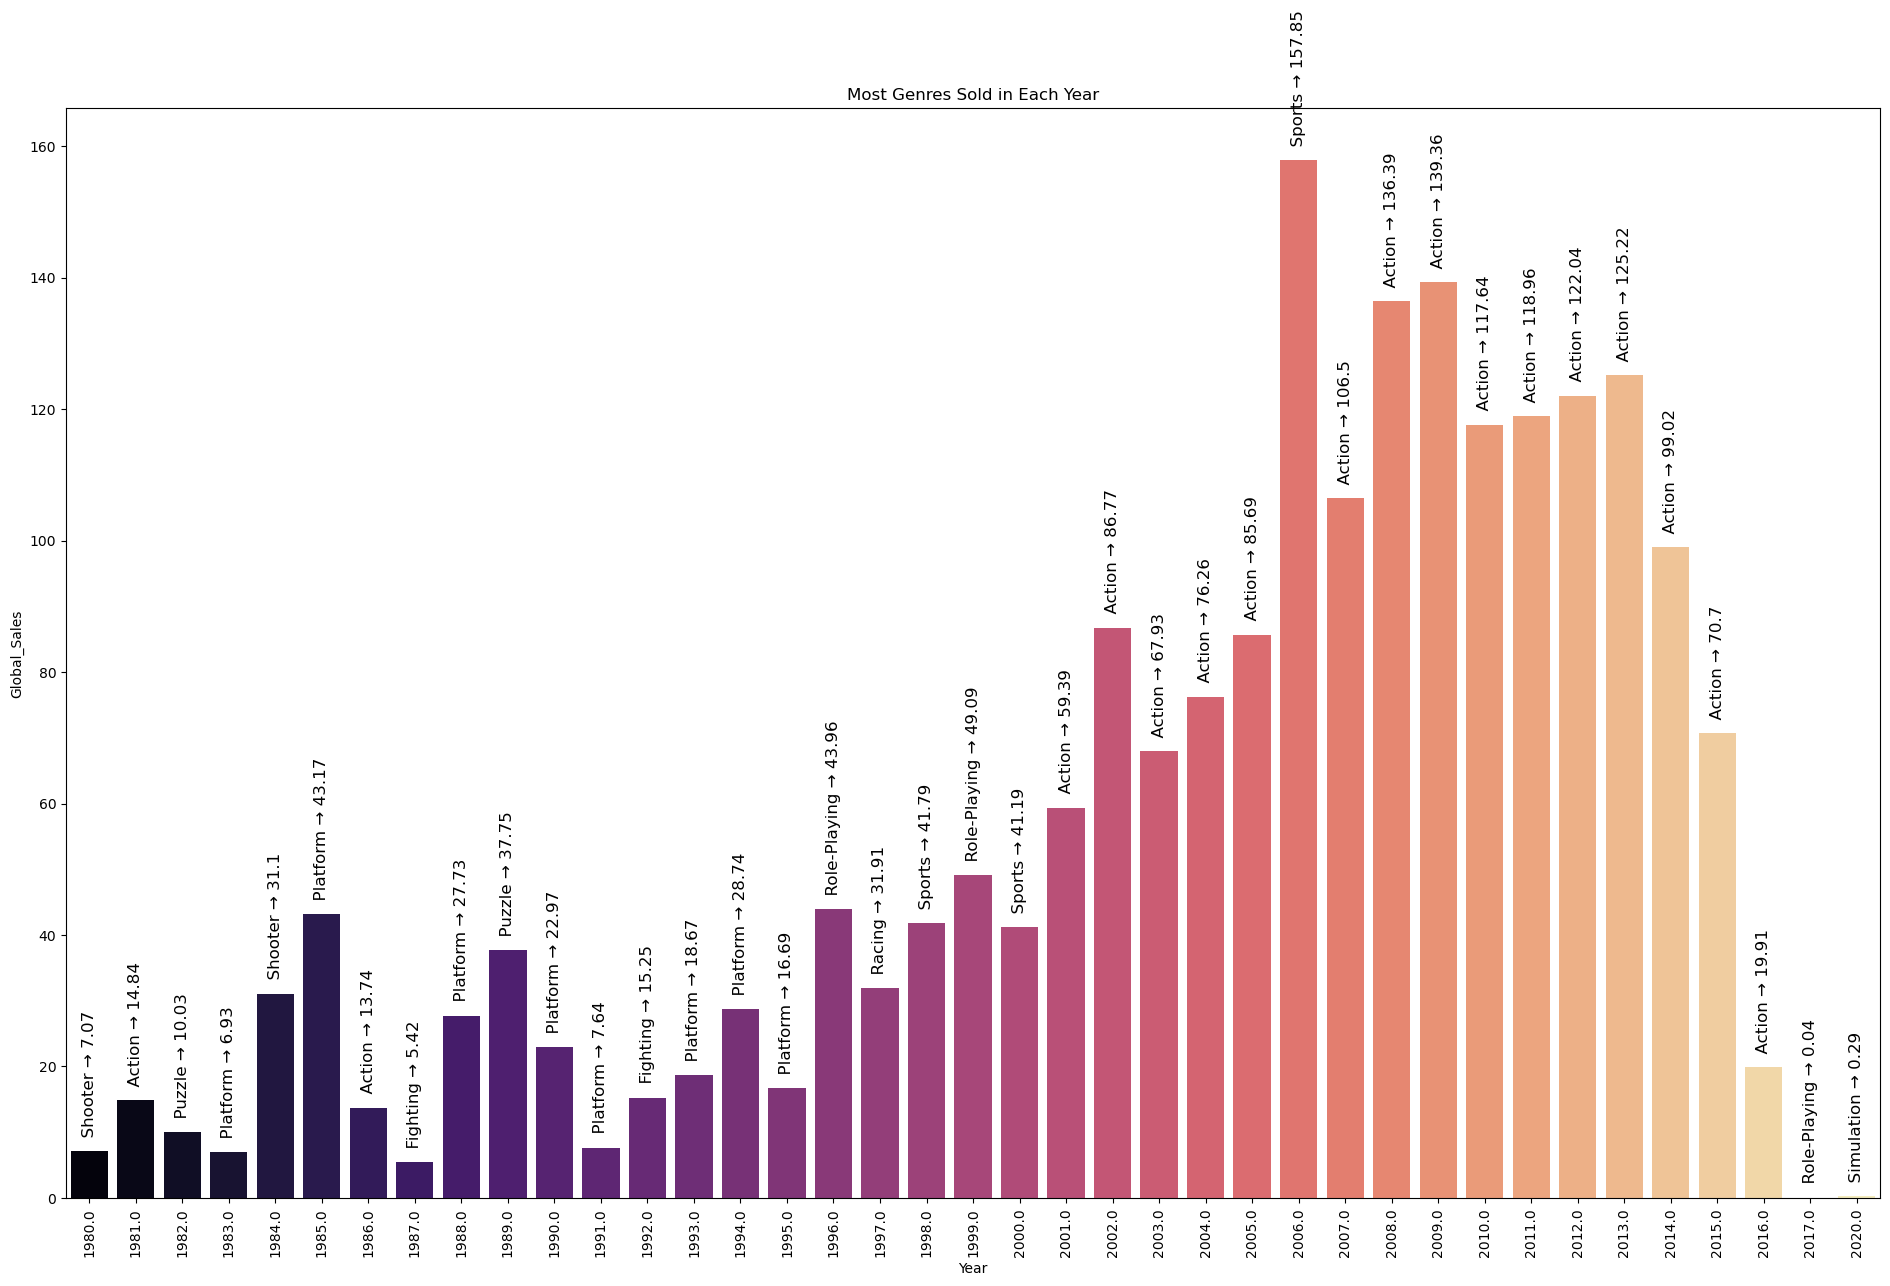

In [35]:
plt.figure(figsize=(19,13))
year_genre_sale_x = df.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().to_frame().reset_index()
max_year = year_genre_sale_x.groupby("Year")["Global_Sales"].max().to_frame().reset_index()
year_genre_sale_x = year_genre_sale_x[year_genre_sale_x.set_index(['Year','Global_Sales']).index.isin(max_year.set_index(['Year','Global_Sales']).index)]
genre = year_genre_sale_x["Genre"].reset_index(drop=True)
g=sns.barplot(x="Year",y="Global_Sales",data=year_genre_sale_x,palette="magma")
index=0
for value in year_genre_sale_x['Global_Sales']:
    g.text(index, value +1, str("  " + genre[index] + ' → ' +str(round(value, 2))), color='#000', size=12, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.title("Most Genres Sold in Each Year")
plt.tight_layout()

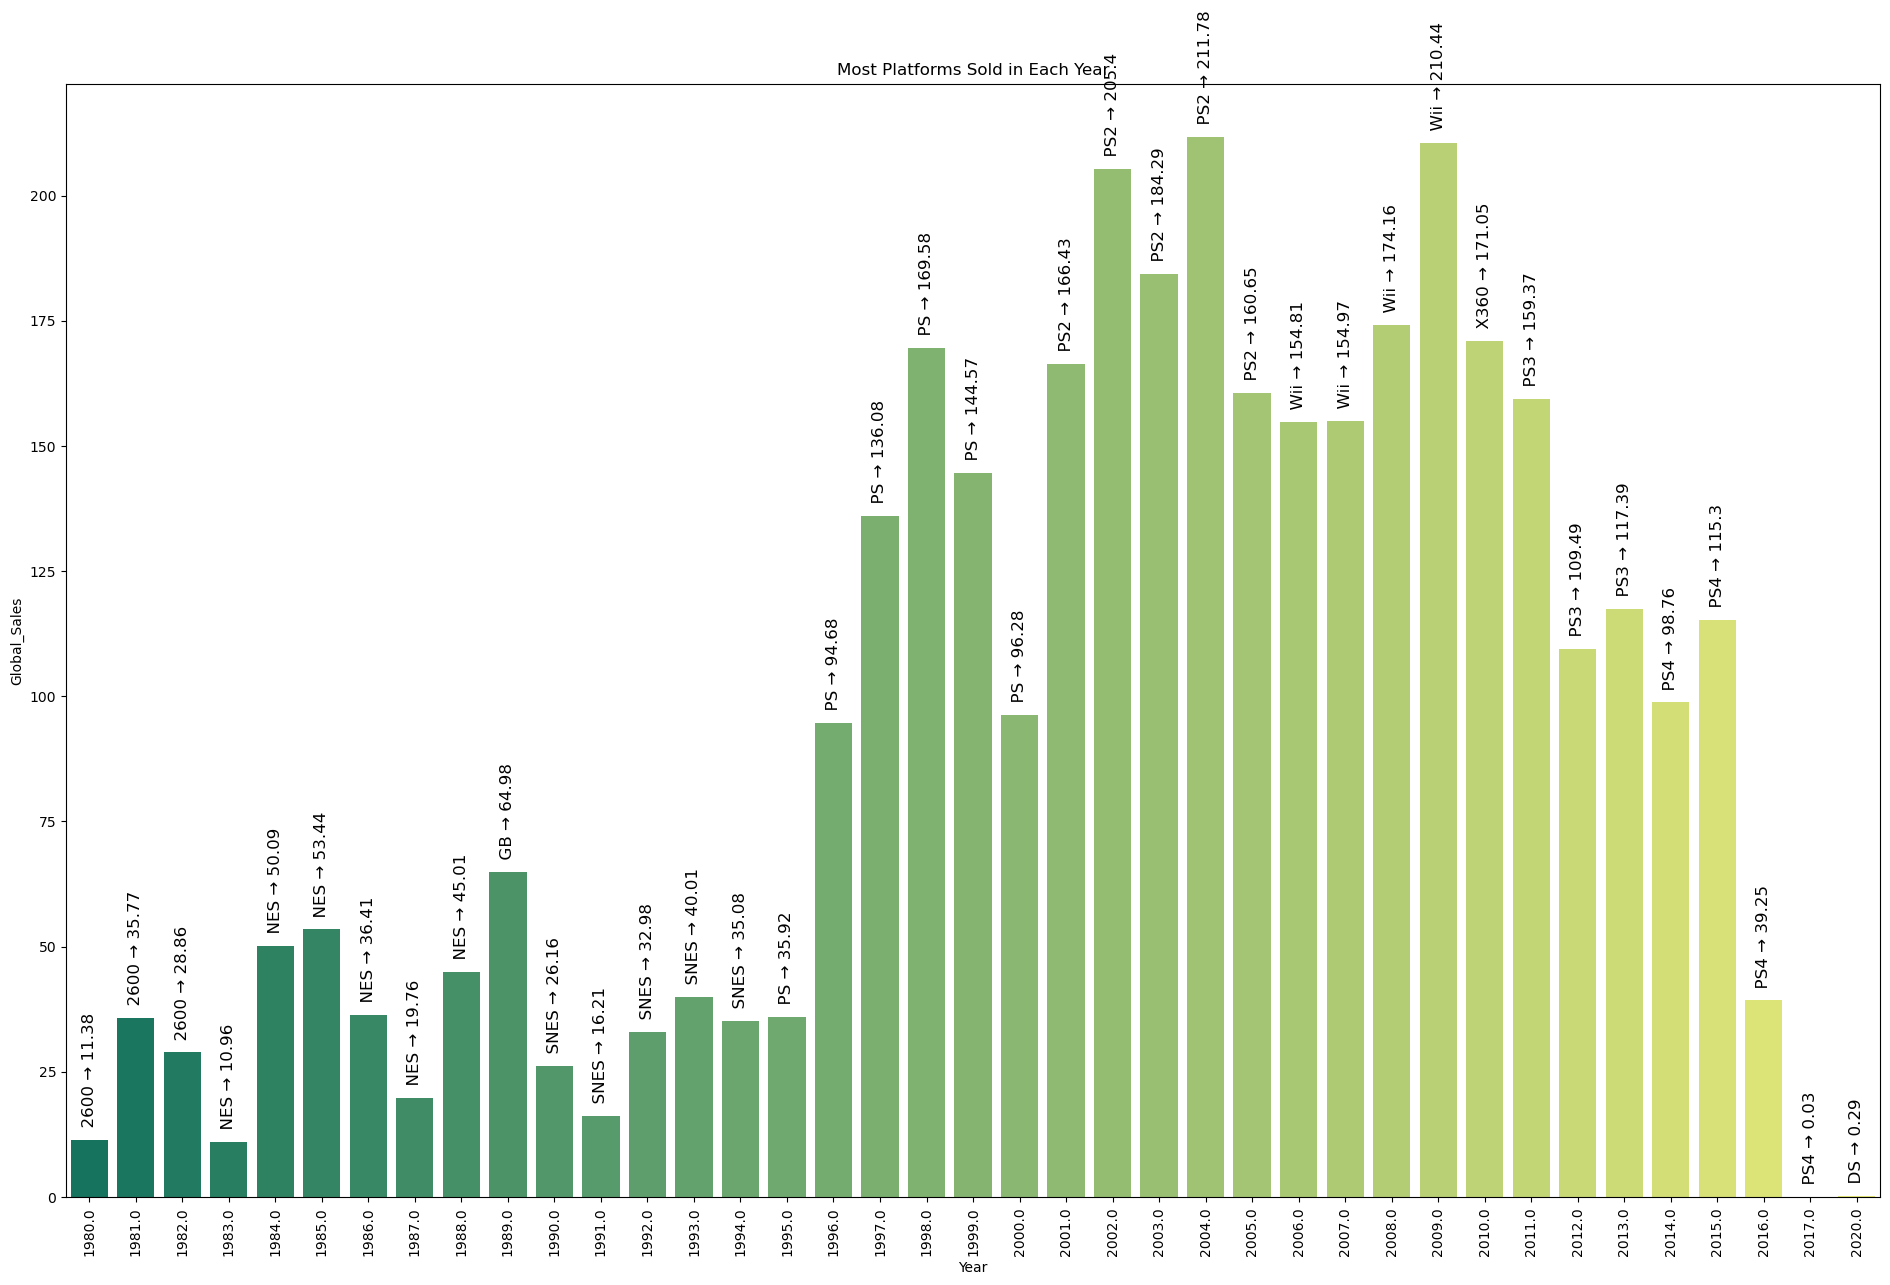

In [36]:
plt.figure(figsize=(19,13))
year_Platform_sale_x = df.groupby(by=['Year', 'Platform'])['Global_Sales'].sum().to_frame().reset_index()
max_year = year_Platform_sale_x.groupby("Year")["Global_Sales"].max().to_frame().reset_index()
year_Platform_sale_x = year_Platform_sale_x[year_Platform_sale_x.set_index(['Year','Global_Sales']).index.isin(max_year.set_index(['Year','Global_Sales']).index)]
Platform = year_Platform_sale_x["Platform"].reset_index(drop=True)
g=sns.barplot(x="Year",y="Global_Sales",data=year_Platform_sale_x,palette="summer")
index=0
for value in year_Platform_sale_x['Global_Sales']:
    g.text(index, value +1, str("  " + Platform[index] + ' → ' +str(round(value, 2))), color='#000', size=12, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.title("Most Platforms Sold in Each Year")
plt.tight_layout()

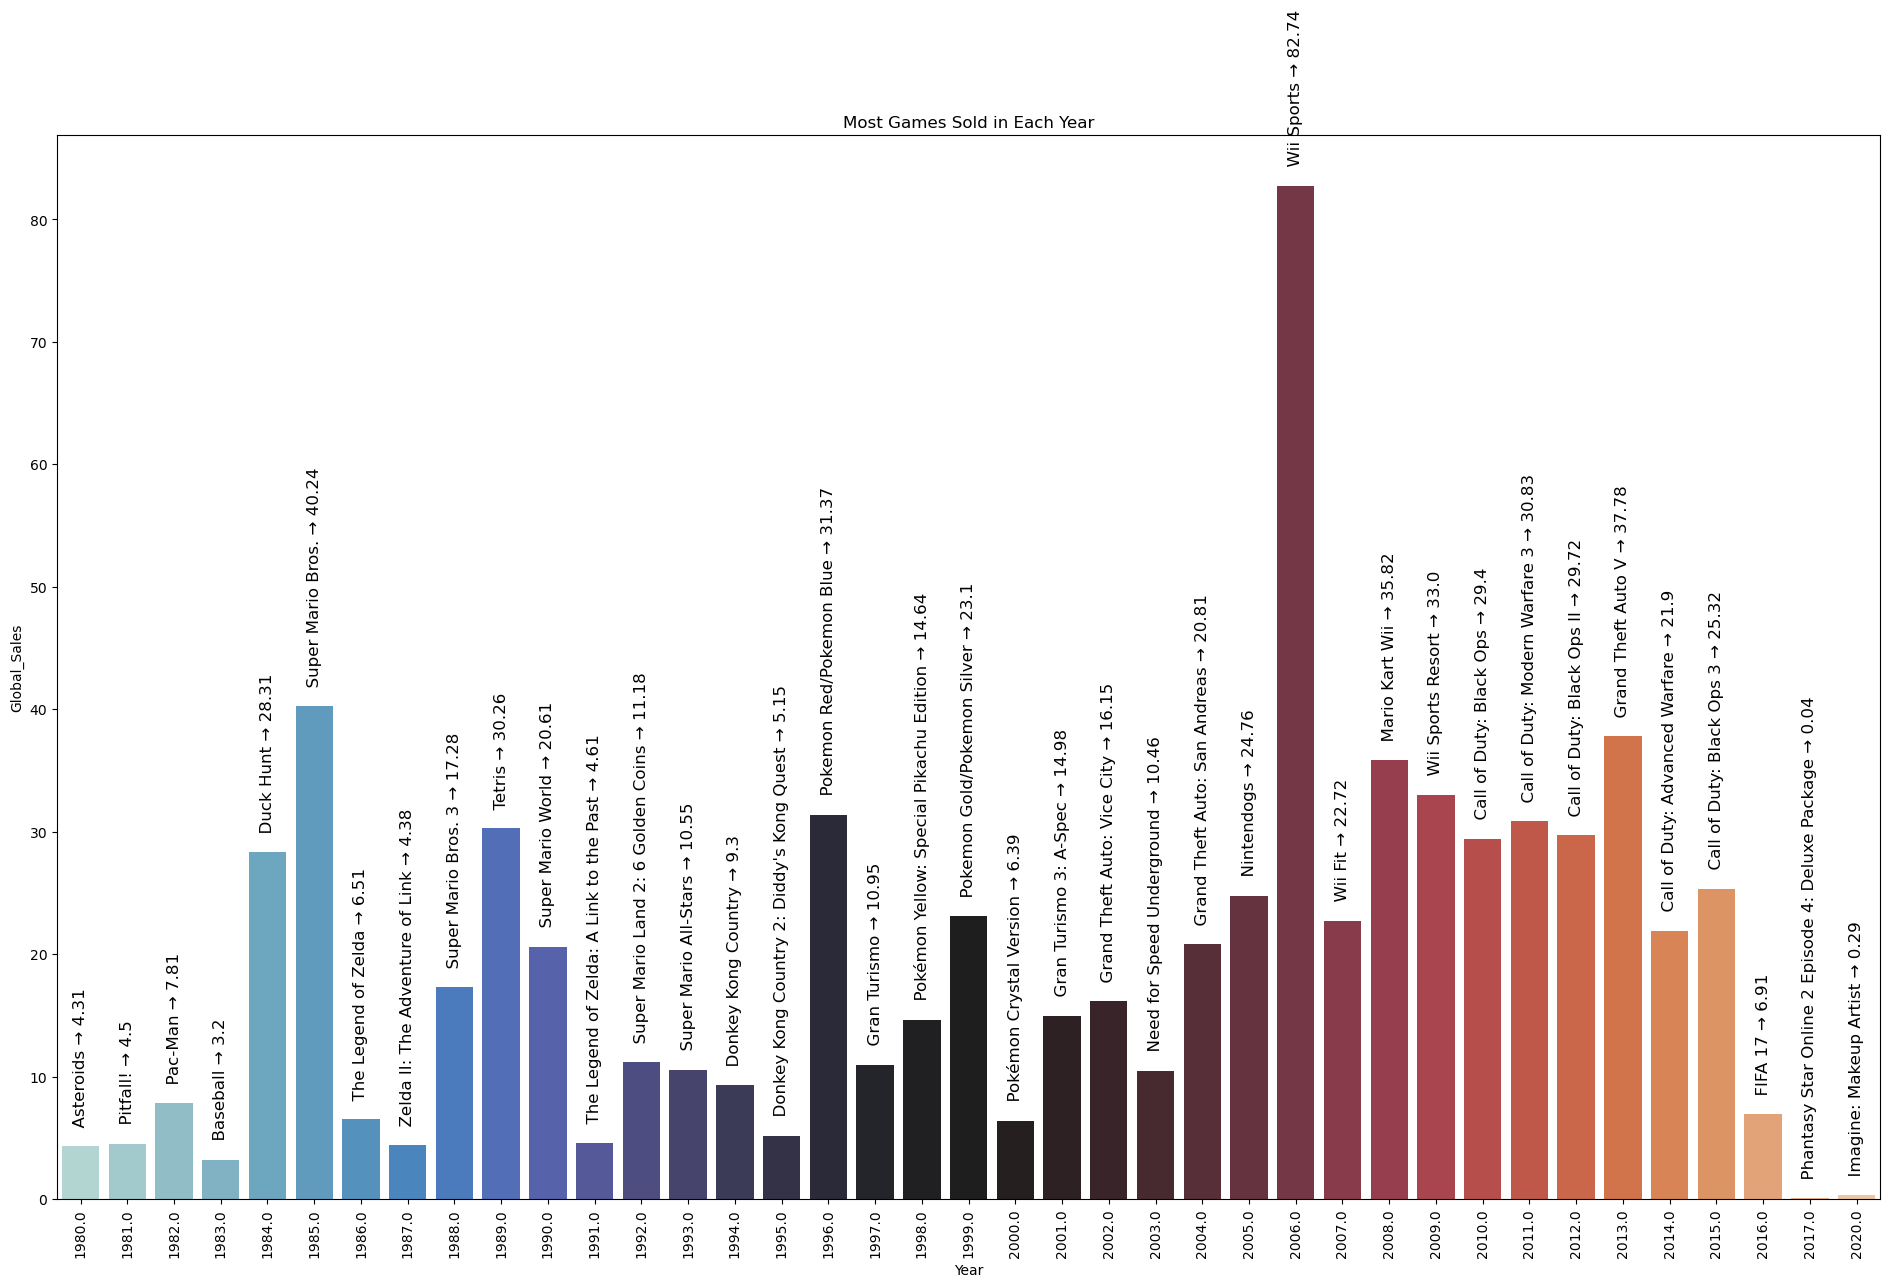

In [37]:
plt.figure(figsize=(19,13))
year_Name_sale_x = df.groupby(by=['Year', 'Name'])['Global_Sales'].sum().to_frame().reset_index()
max_year = year_Name_sale_x.groupby("Year")["Global_Sales"].max().to_frame().reset_index()
year_Name_sale_x = year_Name_sale_x[year_Name_sale_x.set_index(['Year','Global_Sales']).index.isin(max_year.set_index(['Year','Global_Sales']).index)]
Name = year_Name_sale_x["Name"].reset_index(drop=True)
g=sns.barplot(x="Year",y="Global_Sales",data=year_Name_sale_x,palette="icefire")
index=0
for value in year_Name_sale_x['Global_Sales']:
    g.text(index, value +1, str("  " + Name[index] + ' → ' +str(round(value, 2))), color='#000', size=12, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.title("Most Games Sold in Each Year")
plt.tight_layout()

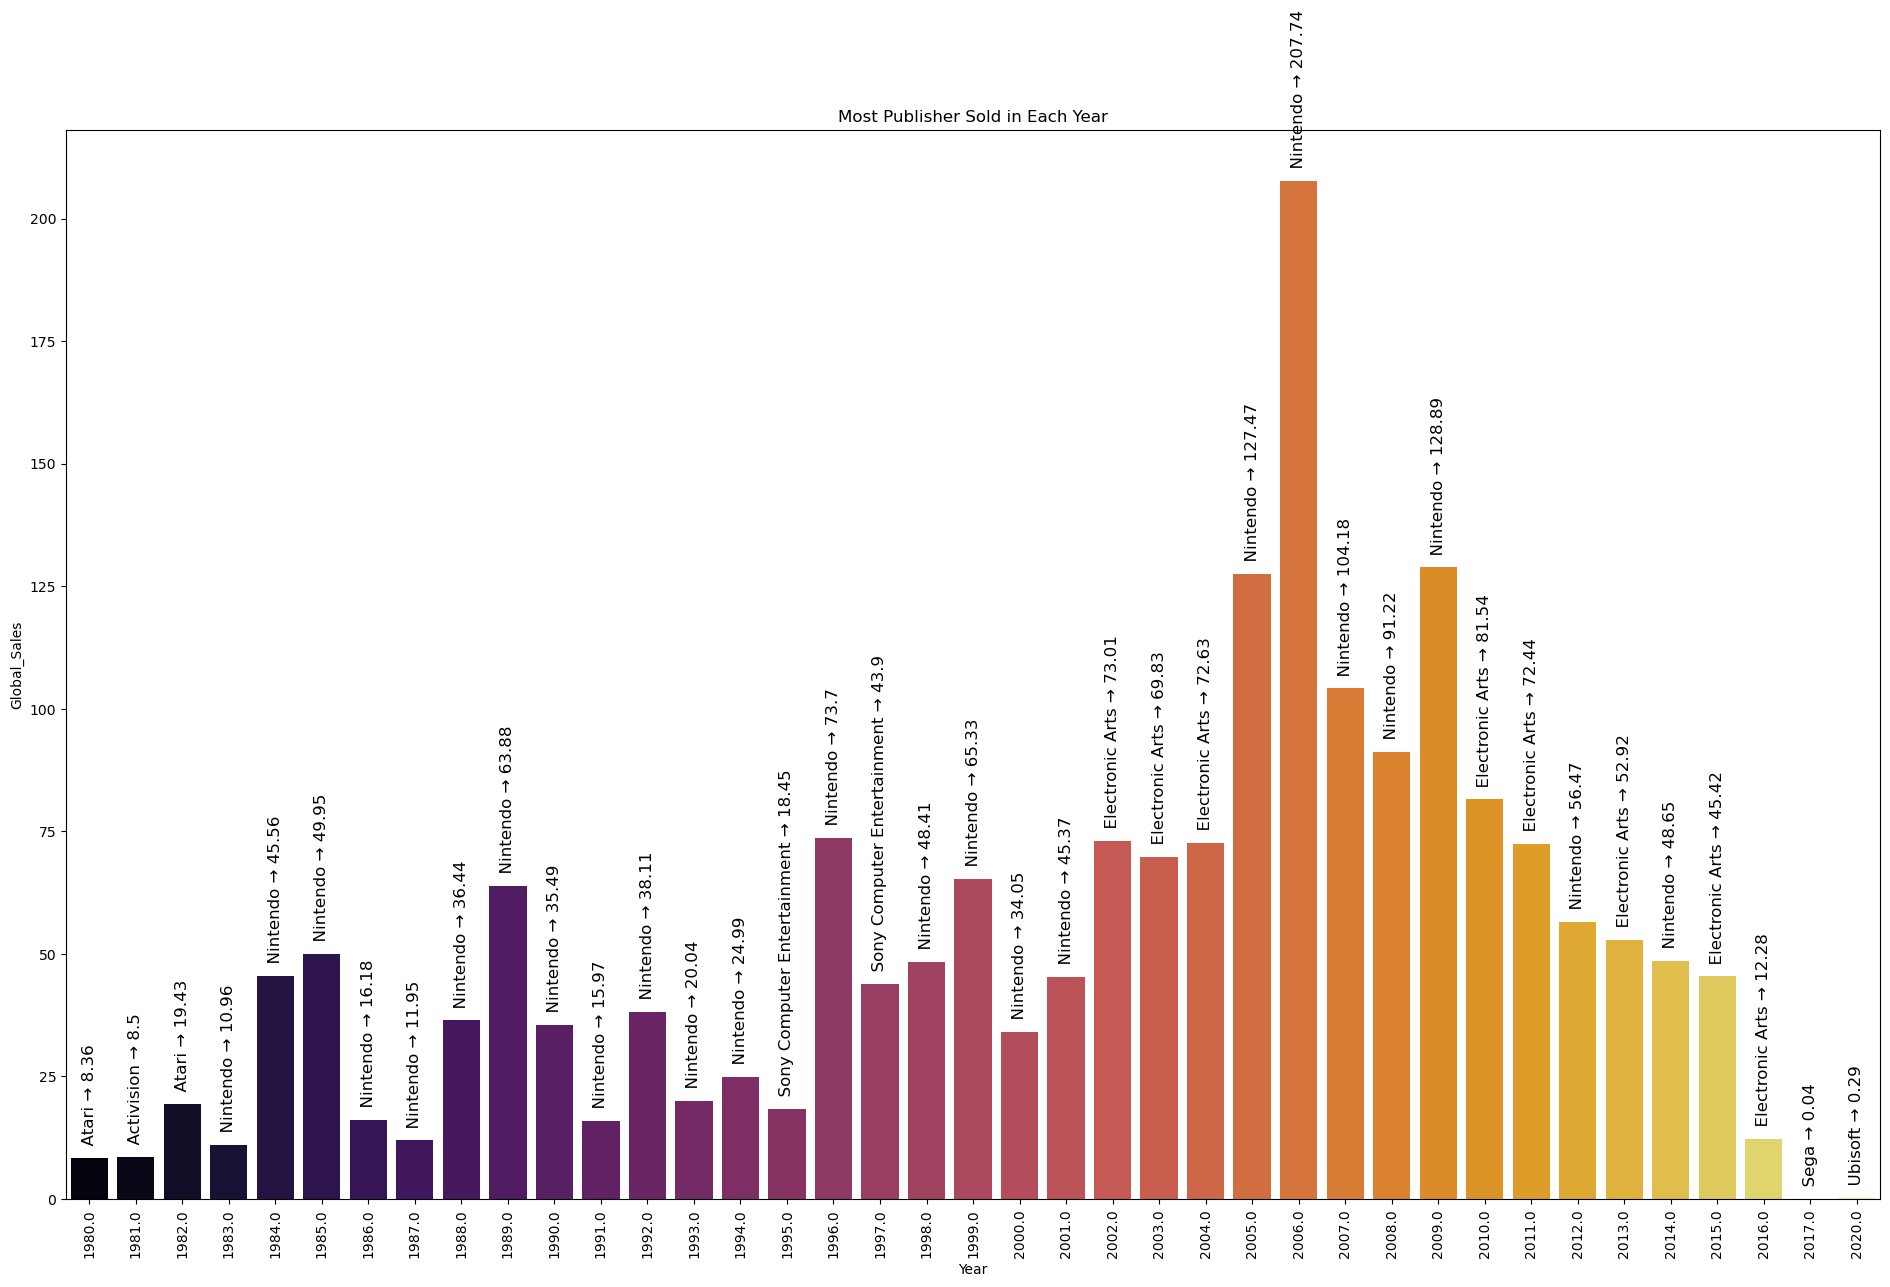

In [38]:
plt.figure(figsize=(19,13))
year_Publisher_sale_x = df.groupby(by=['Year', 'Publisher'])['Global_Sales'].sum().to_frame().reset_index()
max_year = year_Publisher_sale_x.groupby("Year")["Global_Sales"].max().to_frame().reset_index()
year_Publisher_sale_x = year_Publisher_sale_x[year_Publisher_sale_x.set_index(['Year','Global_Sales']).index.isin(max_year.set_index(['Year','Global_Sales']).index)]
Publisher = year_Publisher_sale_x["Publisher"].reset_index(drop=True)
g=sns.barplot(x="Year",y="Global_Sales",data=year_Publisher_sale_x,palette="inferno")
index=0
for value in year_Publisher_sale_x['Global_Sales']:
    g.text(index, value +1, str("  " + Publisher[index] + ' → ' +str(round(value, 2))), color='#000', size=12, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.title("Most Publisher Sold in Each Year")
plt.tight_layout()

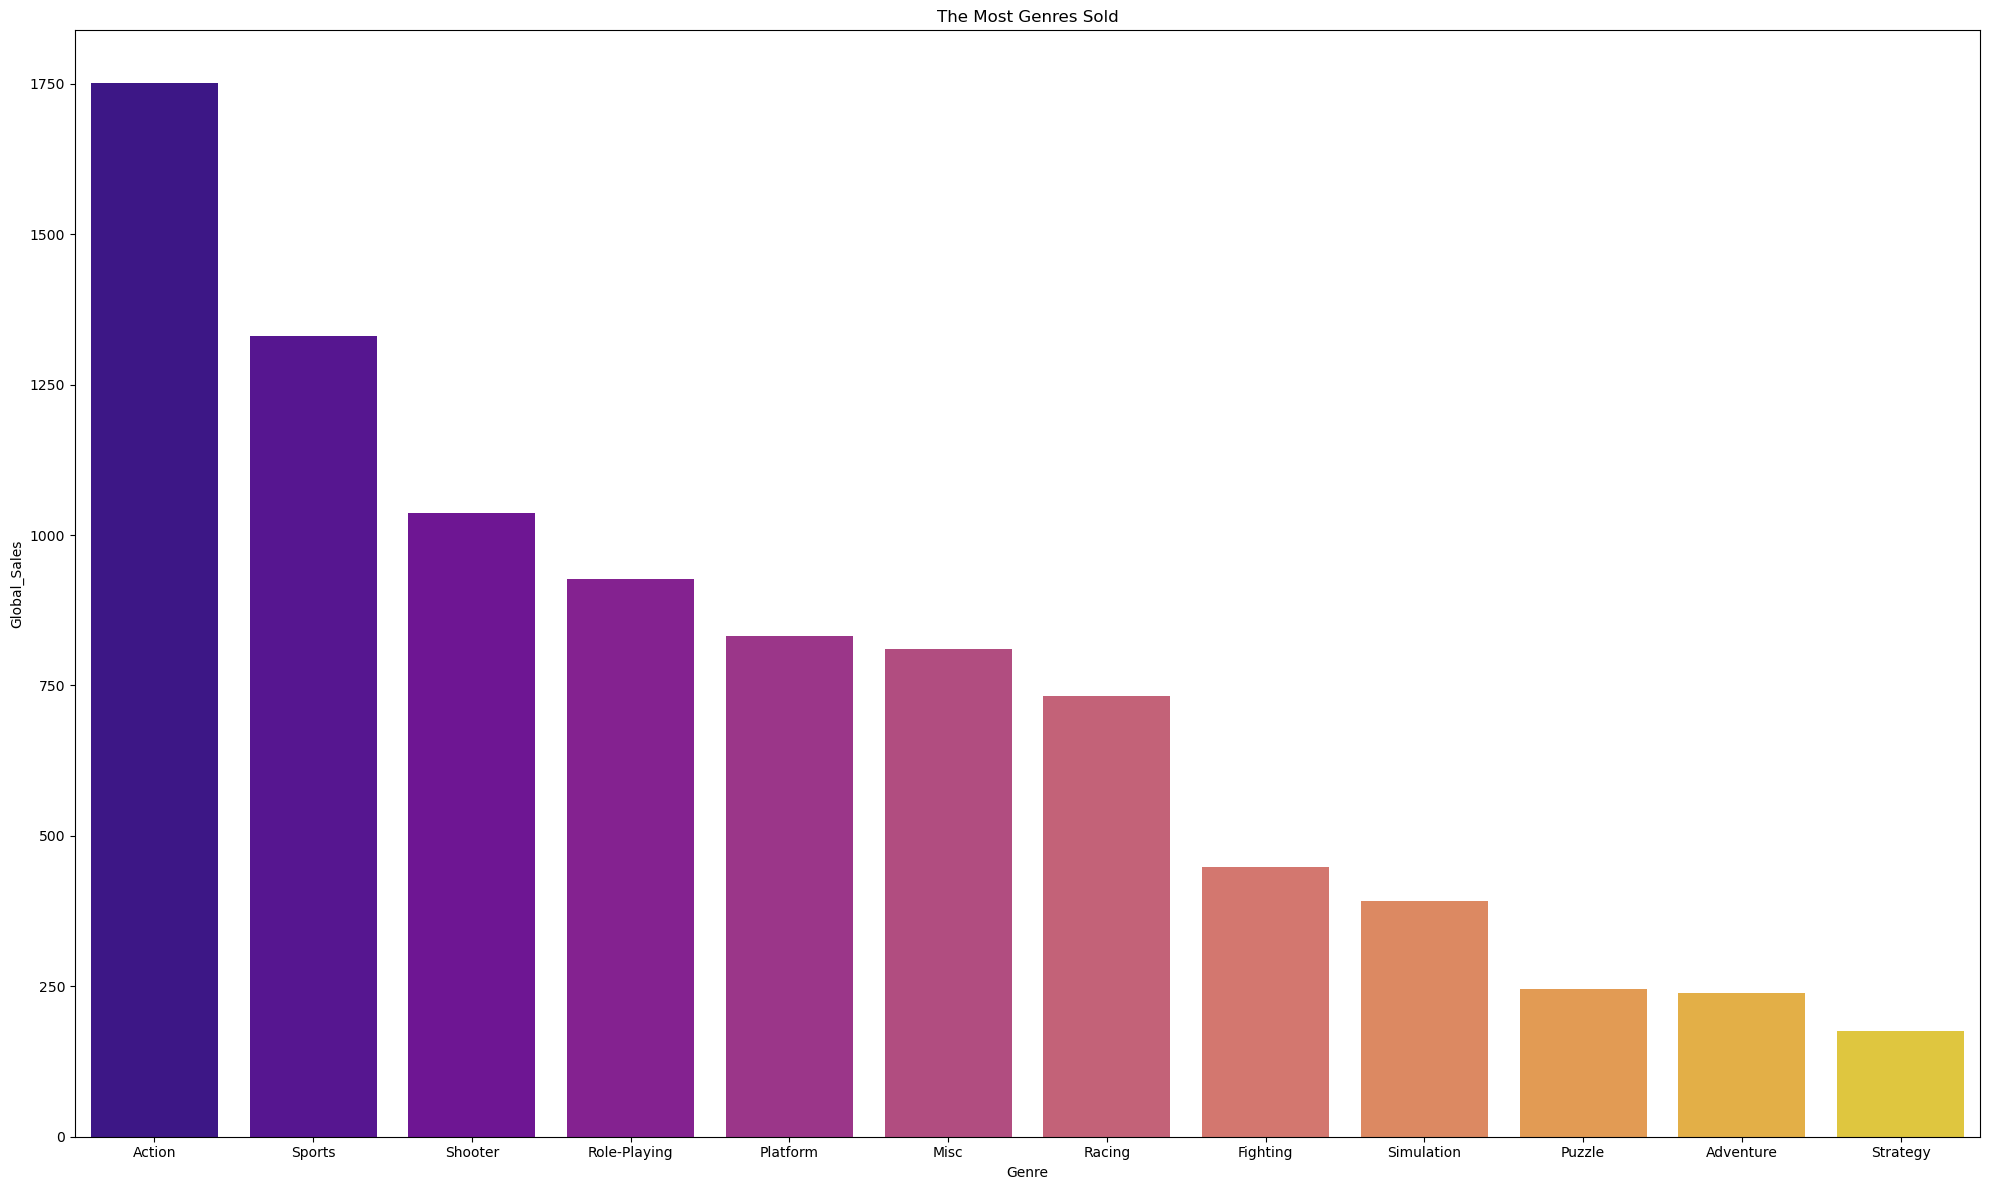

In [39]:
plt.figure(figsize=(20, 12))
genre=df.groupby(["Genre"])["Global_Sales"].sum().reset_index()
genre=genre.sort_values(by="Global_Sales",ascending=False)
sns.barplot(x="Genre",y="Global_Sales",data=genre,palette="plasma")
plt.title("The Most Genres Sold")
plt.tight_layout()

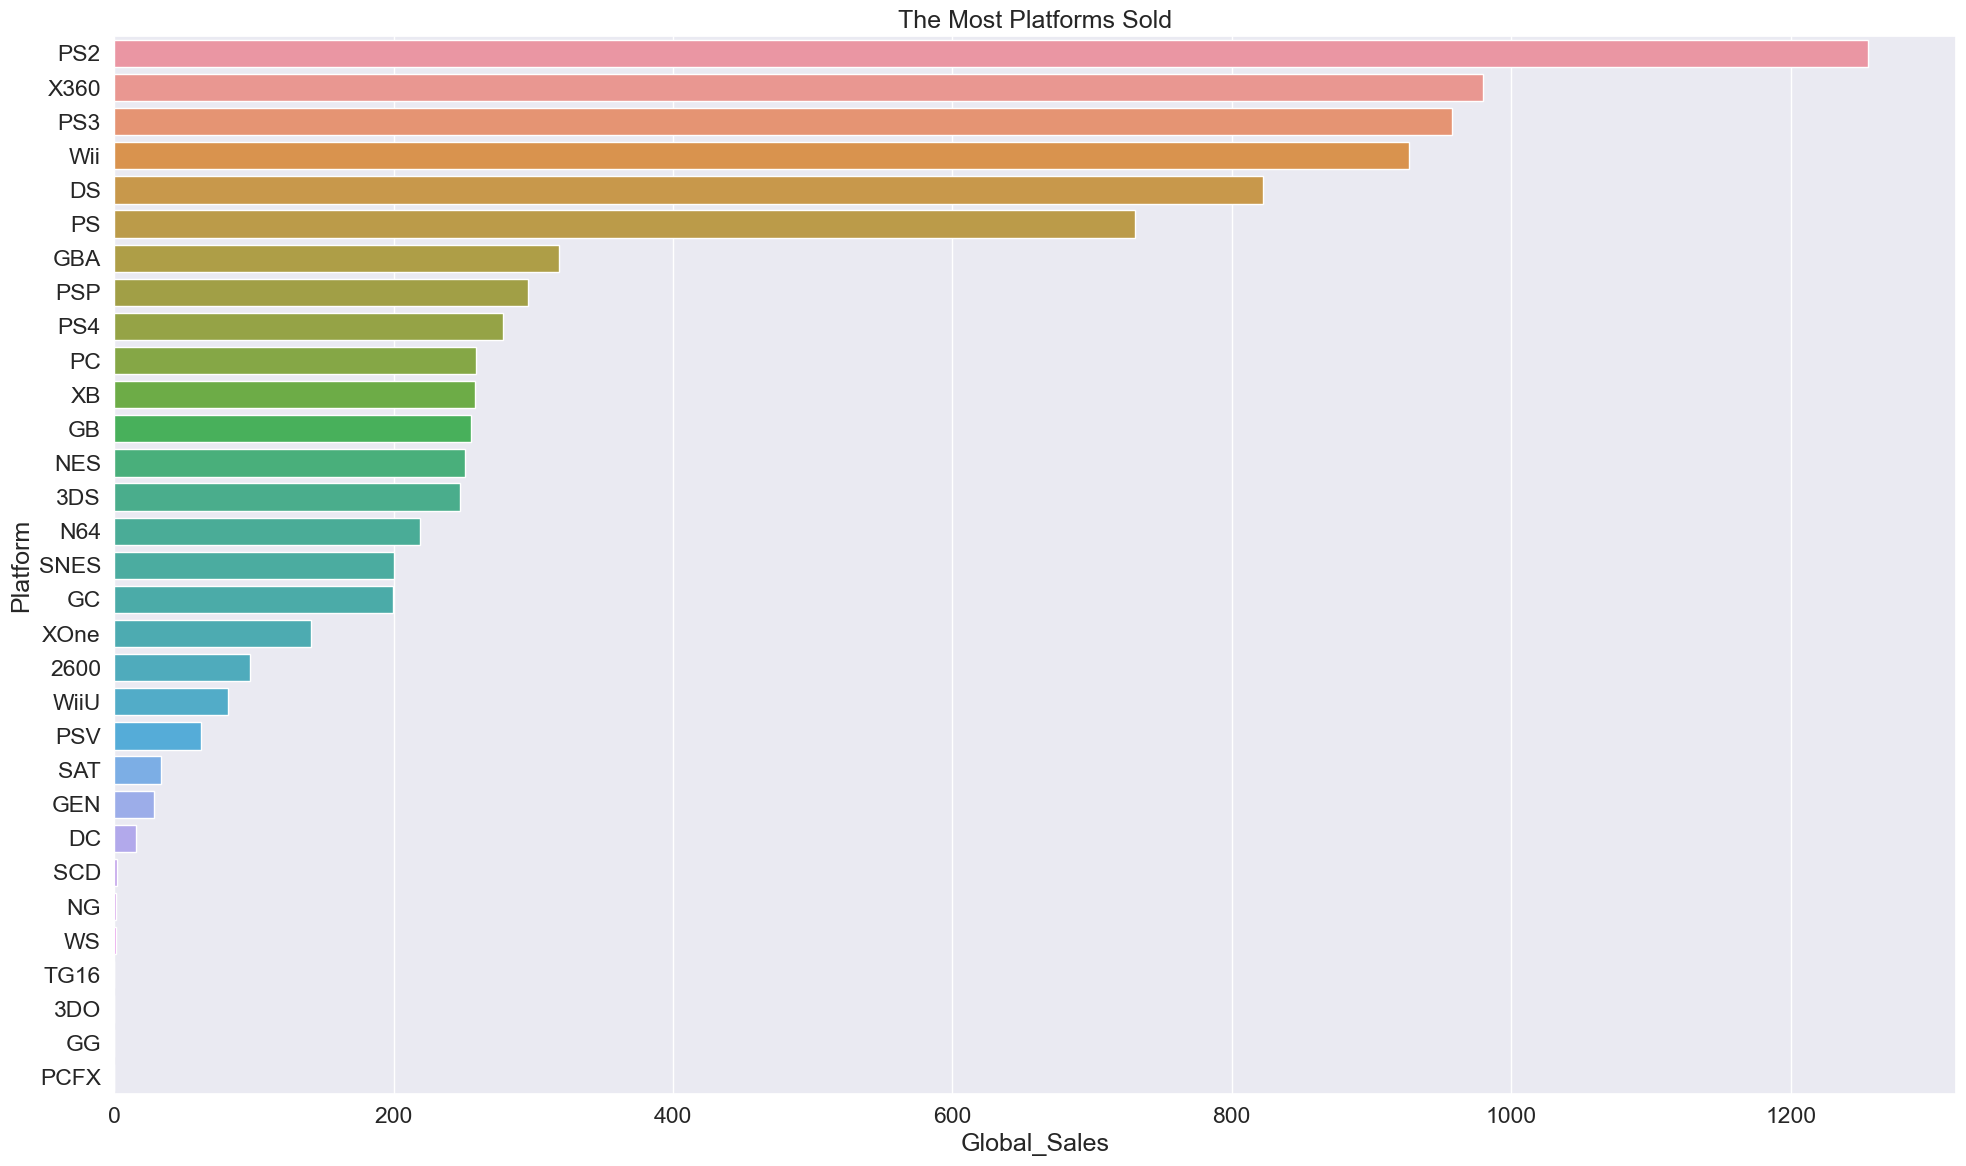

In [40]:
plt.figure(figsize=(20, 12))
sns.set(font_scale = 1.5)
genre=df.groupby(["Platform"])["Global_Sales"].sum().reset_index()
genre=genre.sort_values(by="Global_Sales",ascending=False)
sns.barplot(y="Platform",x="Global_Sales",data=genre)
plt.title("The Most Platforms Sold")
plt.tight_layout()

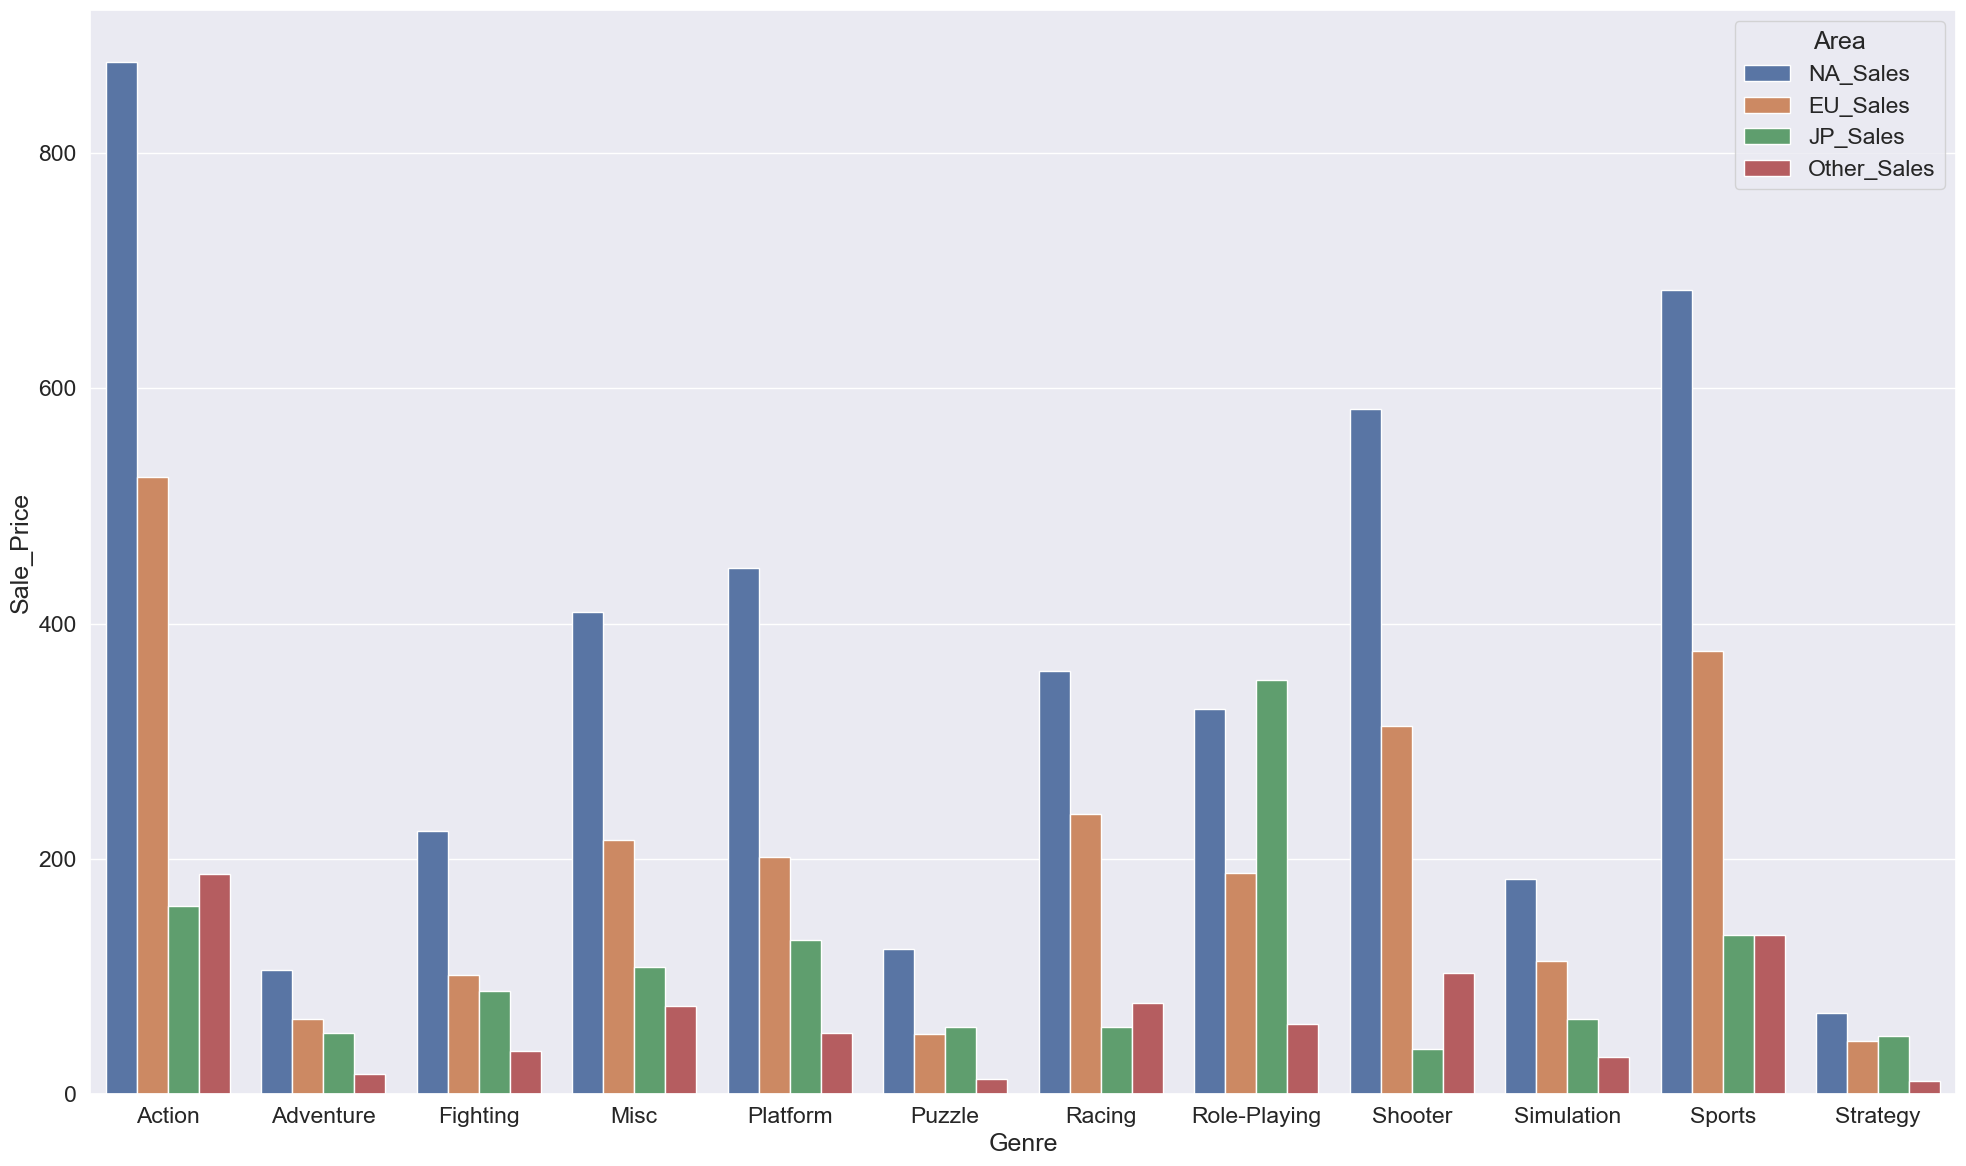

In [41]:
plt.figure(figsize=(20, 12))
Genres=df[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
G=Genres.groupby(["Genre"]).sum()
Genres=G.reset_index()
Genres=pd.melt(Genres, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Area', value_name='Sale_Price')
sns.barplot(x="Genre",y="Sale_Price",data=Genres,hue="Area")
plt.tight_layout()

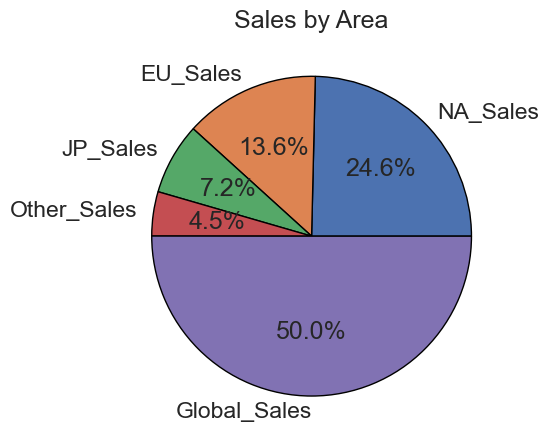

In [42]:
sales=df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',"Global_Sales"]]
sales_dict=dict(sales.sum())
region=sales_dict.keys()
region_value=sales_dict.values()
plt.pie(region_value,labels=region,wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.title("Sales by Area")
plt.tight_layout()

In [43]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [44]:
df.drop(["Rank","Name","Publisher"],axis=1,inplace=True)

In [45]:
df.rename(columns={"Platform":"Plat"},inplace=True)

In [46]:
dummie = pd.get_dummies(df["Genre"])
df = pd.concat([df,dummie],axis=1)
df.drop("Genre",axis=1,inplace=True)

In [47]:
label = LabelEncoder()
df["Plat"] = label.fit_transform(df["Plat"])

In [48]:
X = df.drop("Global_Sales",axis=1)
Y = df["Global_Sales"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [50]:
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = sqrt(RSS / (len(y_true) - 2))
    return rse

In [51]:
models=[LinearRegression(),RandomForestRegressor(n_estimators=42,n_jobs=-1),AdaBoostRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(),XGBRegressor(),LGBMRegressor()]
model_names=["LinearRegression","RandomForestRegressor","AdaBoostRegressor","KNeighborsRegressor","DecisionTreeRegressor","GradientBoostingRegressor","XGBRegressor","LGBMRegressor"]
MSE=[]
r_2=[]
RSE_ = []
accuracy = []
RMSE = []
for model in range (len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    MSE.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
    r_2.append(r2_score(y_true=y_test,y_pred=y_pre))
    RSE_.append(round(RSE(y_test,y_pre),5))
    accuracy.append((model.score(X_test,y_test))*100)
    RMSE.append(sqrt(mean_squared_error(y_true=y_test,y_pred=y_pre)))
model_report=pd.DataFrame({'Modelling Name':model_names,'MSE':MSE,"R_2":r_2,"RSE":RSE_,"Accuracy":accuracy,"RMSE":RMSE})


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 11618, number of used features: 18
[LightGBM] [Info] Start training from score 0.529263


In [52]:
model_report

,Modelling Name,MSE,R_2,RSE,Accuracy,RMSE
0,LinearRegression,0.00003,0.999988,0.00527,99.998776,0.005268
1,RandomForestRegressor,0.05571,0.975437,0.23608,97.543719,0.236035
2,AdaBoostRegressor,1.02834,0.546620,1.01428,54.661999,1.014072
3,KNeighborsRegressor,0.35293,0.844401,0.59419,84.440072,0.594075
4,DecisionTreeRegressor,0.10390,0.954194,0.32239,95.419409,0.322328
5,GradientBoostingRegressor,0.04925,0.978287,0.22196,97.828731,0.221919
6,XGBRegressor,0.06241,0.972485,0.24987,97.248477,0.249818
7,LGBMRegressor,0.16164,0.928734,0.40213,92.873379,0.402049


In [53]:
model = LinearRegression()

In [54]:
model.fit(X,Y)

LinearRegression()